# Import libraries and data


In [1]:
%cd D://Flood Risk Churn-MF/Evaluacion del dataset 25001 para validacion de articulo/25044

D:\Flood Risk Churn-MF\Evaluacion del dataset 25001 para validacion de articulo\25044


C:\Users\ZM\AppData\Roaming\Python\Python311\site-packages\IPython\core\magics\osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [ ]:
%pip install xgboost

In [2]:
#import libraries
import xgboost as xgb
import itertools
import pandas as pd
import numpy as np

In [2]:
#import libraries
import pandas as pd
import tensorflow_probability as tfp
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
plt.style.use('seaborn-v0_8-talk')
plt.rcParams['lines.linewidth']=1.5
dark_style={
 'figure.facecolor':'#212946',
 'axes.facecolor':'#212946',
 'savefig.facecolor':'#212946',
 'axes.grid':True,
 'axes.grid.which':'both',
 'axes.spines.top':False,
 'axes.spines.bottom':False,
 'grid.color':'#2A3459',
 'grid.linewidth':'1',
 'text.color':'0.9',
 'axes.labelcolor':'0.9',
 'xtick.color':'0.9',
 'ytick.color':'0.9',
 'font.size':12
}
#plt.rcParams.update(dark_style)

In [5]:
import pandas as pd
import tensorflow_probability as tfp
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
plt.rcParams['lines.linewidth']=1.5

NameError: name 'datos_diff_1' is not defined

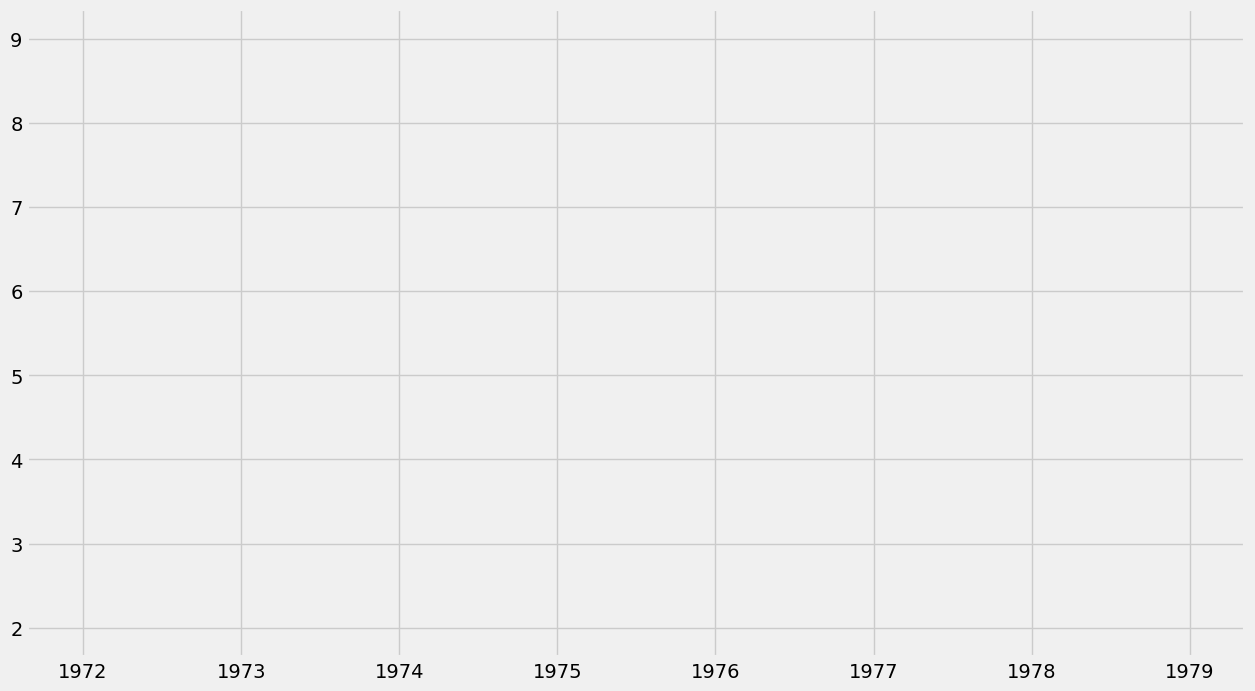

In [20]:
#plt.plot(y_test,color="Lime",linewidth=1.5,label="Test")
#predictions_tfp.plot(legend = True, label="Prediccion")


warnings.filterwarnings("default")
# Gráfico series
# ==============================================================================
plt.figure(figsize=(14,8))
#fig, axs = plt.subplots(nrows=3, ncols=1, figsize=(17, 5), sharex=True)
#data['TMIN'].plot(ax=axs[0], title='Serie original')
#datos_diff_1.plot(ax=axs[1], title='Diferenciación orden 1')
#datos_diff_2.plot(ax=axs[2], title='Diferenciación orden 2');

plt.plot(data['TMIN'],color="Lime",linewidth=1.5,label="Serie")
plt.plot(datos_diff_1,color="Red",linewidth=1.5,label="Serie")


In [3]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from sktime.forecasting.base import ForecastingHorizon
from sktime.forecasting.model_selection import temporal_train_test_split
from sktime.performance_metrics.forecasting import *
from sktime.forecasting.naive import NaiveForecaster
from sktime.forecasting.tbats import TBATS
from sktime.utils.plotting import plot_series

In [6]:
#get the data
data = pd.read_csv("25044_mens.csv",
                   index_col="DATE",
                   parse_dates=True)
dataset = data.loc[:, ["Year","Month","EVAP","PRECIP","TMAX","TMIN"]]
dataset.head(1)   

data = dataset[dataset.Year.isin( [1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985])]
data.head()

Year  Month       EVAP  PRECIP  TMAX  TMIN
DATE                                                  
1972-01-01  1972      1   3.316129    28.7  32.0   9.0
1972-02-01  1972      2   4.948276     0.0  36.5   6.0
1972-03-01  1972      3   6.635484     0.0  38.0   8.5
1972-04-01  1972      4   9.373333     0.0  43.0  10.0
1972-05-01  1972      5  11.229032   125.4  42.0  14.5

#Data Transformation

In [7]:
data.index = pd.to_datetime(data.index,
                            format = "%d/%m/%Y")
data.head(2)   
data = data.asfreq("MS")
data.index   

DatetimeIndex(['1972-01-01', '1972-02-01', '1972-03-01', '1972-04-01',
               '1972-05-01', '1972-06-01', '1972-07-01', '1972-08-01',
               '1972-09-01', '1972-10-01',
               ...
               '1984-12-01', '1985-01-01', '1985-02-01', '1985-03-01',
               '1985-04-01', '1985-05-01', '1985-06-01', '1985-07-01',
               '1985-08-01', '1985-09-01'],
              dtype='datetime64[ns]', name='DATE', length=165, freq='MS')

In [8]:
data.index.year

Index([1972, 1972, 1972, 1972, 1972, 1972, 1972, 1972, 1972, 1972,
       ...
       1984, 1985, 1985, 1985, 1985, 1985, 1985, 1985, 1985, 1985],
      dtype='int32', name='DATE', length=165)

In [9]:
def metricas(y_true,y_pred,model_name):
    mae_=mean_absolute_error(y_true,y_pred)
    rmse_=mean_squared_error(y_true,y_pred,square_root=True)
    mape_=mean_absolute_percentage_error(y_true,y_pred)
    smape_=mean_absolute_percentage_error(y_true,y_pred,symmetric=True)
    dict_={'MAE':mae_,'RMSE_':rmse_,'MAPE':mape_,'SMAPE':smape_}
    metrica1=pd.DataFrame(dict_,index=[model_name])
    return(metrica1.round(decimals=2))

In [10]:
from sktime.forecasting.model_selection import temporal_train_test_split
y_train,y_test=temporal_train_test_split(data['EVAP'],test_size=36)
y_train1, y_test1=temporal_train_test_split(data['EVAP'],test_size=36)
y_train.head(10)

DATE
1972-01-01     3.316129
1972-02-01     4.948276
1972-03-01     6.635484
1972-04-01     9.373333
1972-05-01    11.229032
1972-06-01     9.036667
1972-07-01     6.641935
1972-08-01     5.825806
1972-09-01     4.696667
1972-10-01     4.735484
Freq: MS, Name: EVAP, dtype: float64

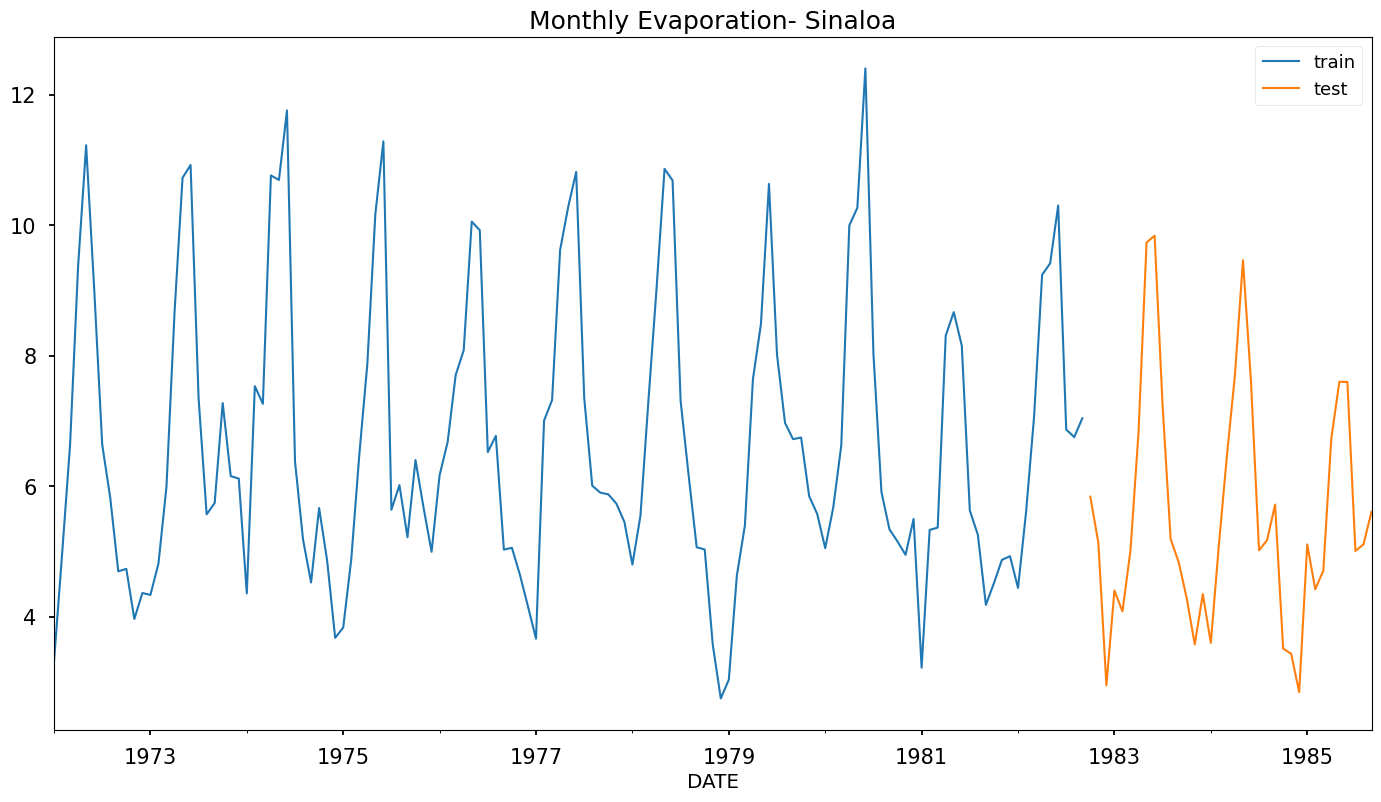

In [11]:
# Gráfico
# ======================================================================================
fig, ax=plt.subplots(figsize=(17, 9))
y_train.plot(ax=ax, label='train',fontsize=15)
y_test.plot(ax=ax, label='test',fontsize=15)
ax.set_title('Monthly Evaporation- Sinaloa',fontsize=18)
ax.legend();

Test estacionariedad serie original
-------------------------------------
ADF Statistic: -2.7198829702323053, p-value: 0.07066038907800046
KPSS Statistic: 0.22484358432561807, p-value: 0.1

Test estacionariedad para serie diferenciada (order=1)
--------------------------------------------------
ADF Statistic: -4.095020003957192, p-value: 0.0009870455510570984
KPSS Statistic: 0.04738017429766599, p-value: 0.1

Test estacionariedad para serie diferenciada (order=2)
--------------------------------------------------
ADF Statistic: -13.012502558870565, p-value: 2.5505447651394867e-24
KPSS Statistic: 0.10467405013487602, p-value: 0.1


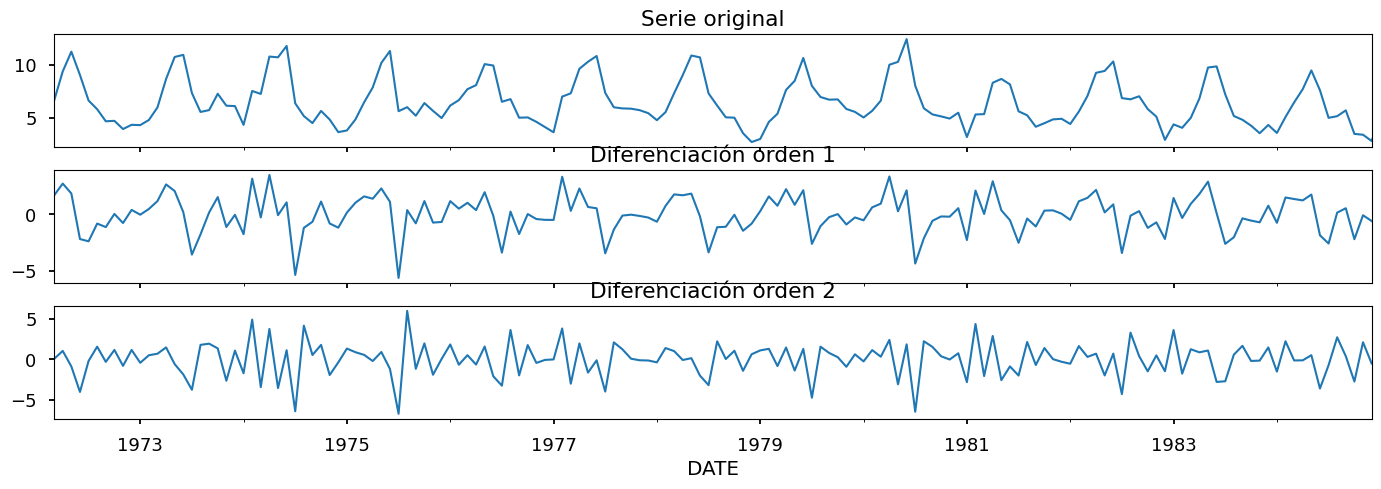

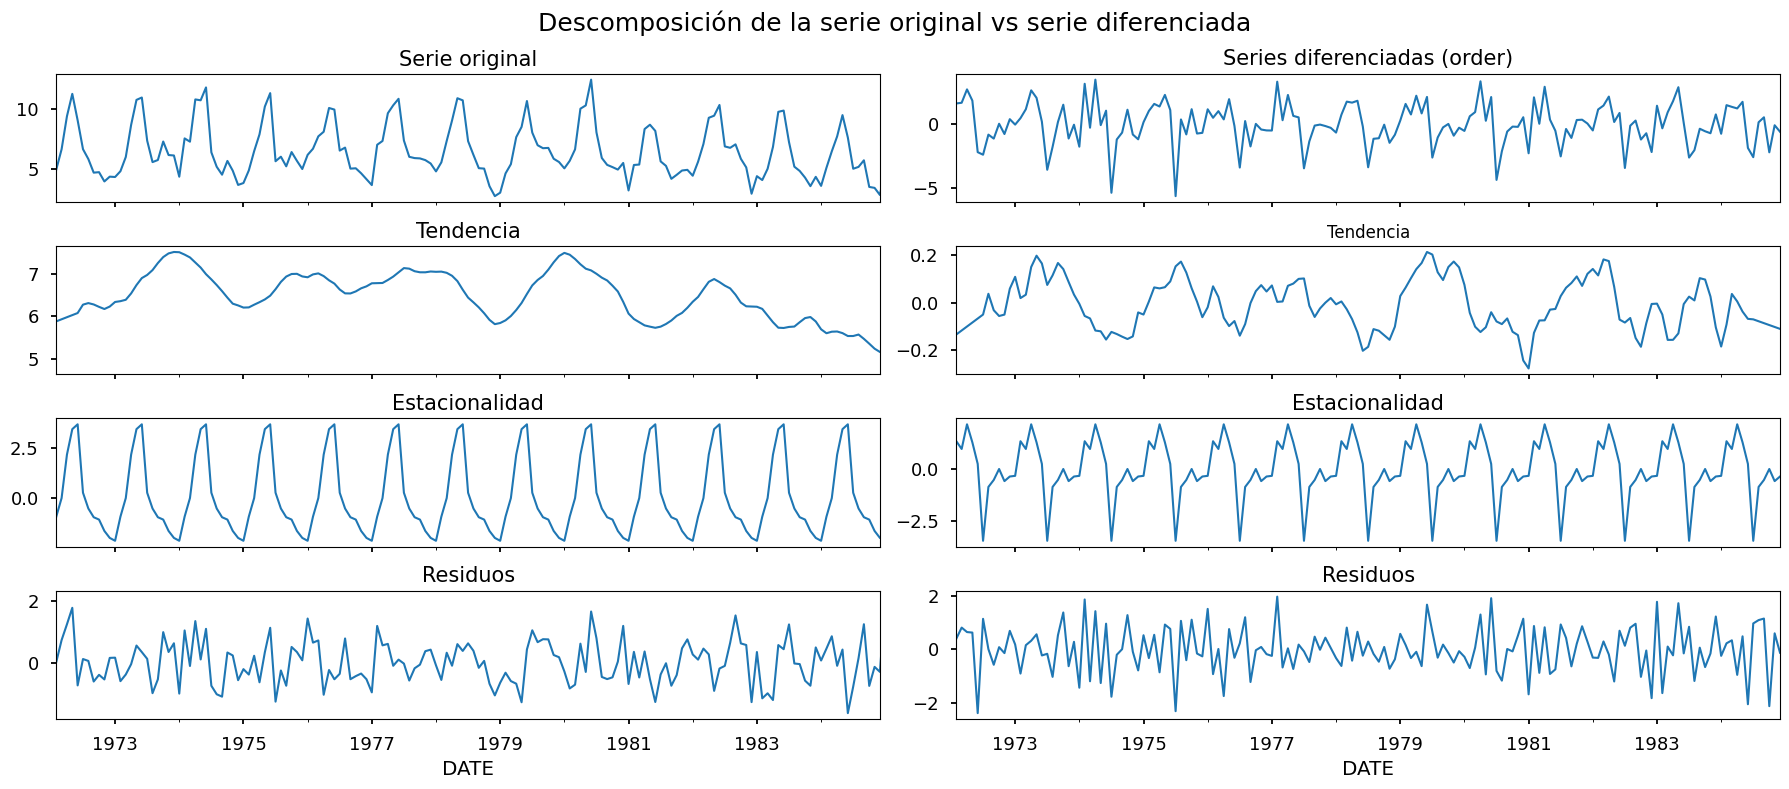

In [12]:
#get the data
data = pd.read_csv("25044_mens.csv",
                   index_col="DATE",
                   parse_dates=True)
dataset = data.loc[:, ["Year","Month","EVAP","PRECIP","TMAX","TMIN"]]


#data = dataset[dataset.Year.isin( [1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982])]
data = dataset[dataset.Year.isin( [1972,1973,1974,1975,1976,1977,1978,1979,1980,
                                   1981,1982,1983,1984,1985])]

#data = dataset[dataset.Year.isin( [1972,1973,1974,1975,1976,1977])]
#data = dataset[dataset.Year.isin( [1972,1973,1974])]

data.index = pd.to_datetime(data.index,
                            format = "%d/%m/%Y") 
data = data.asfreq("MS")
from sktime.forecasting.model_selection import temporal_train_test_split
y_train,y_test=temporal_train_test_split(data['EVAP'],test_size=9)

#Test estacionariedad
# ==============================================================================
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import kpss
warnings.filterwarnings("ignore")

datos_diff_1 = y_train.diff().dropna()
datos_diff_2 = datos_diff_1.diff().dropna()

print('Test estacionariedad serie original')
print('-------------------------------------')
adfuller_result = adfuller(data['EVAP'])
kpss_result = kpss(data['EVAP'])
print(f'ADF Statistic: {adfuller_result[0]}, p-value: {adfuller_result[1]}')
print(f'KPSS Statistic: {kpss_result[0]}, p-value: {kpss_result[1]}')

print('\nTest estacionariedad para serie diferenciada (order=1)')
print('--------------------------------------------------')
adfuller_result = adfuller(datos_diff_1)
kpss_result = kpss(data['EVAP'].diff().dropna())
print(f'ADF Statistic: {adfuller_result[0]}, p-value: {adfuller_result[1]}')
print(f'KPSS Statistic: {kpss_result[0]}, p-value: {kpss_result[1]}')

print('\nTest estacionariedad para serie diferenciada (order=2)')
print('--------------------------------------------------')
adfuller_result = adfuller(datos_diff_2)
kpss_result = kpss(data['EVAP'].diff().diff().dropna())
print(f'ADF Statistic: {adfuller_result[0]}, p-value: {adfuller_result[1]}')
print(f'KPSS Statistic: {kpss_result[0]}, p-value: {kpss_result[1]}')

warnings.filterwarnings("default")
# Gráfico series
# ==============================================================================
fig, axs = plt.subplots(nrows=3, ncols=1, figsize=(17, 5), sharex=True)
data['EVAP'].plot(ax=axs[0], title='Serie original')
datos_diff_1.plot(ax=axs[1], title='Diferenciación orden 1')
datos_diff_2.plot(ax=axs[2], title='Diferenciación orden 2');

# Descomposición de la serie original y la serie diferenciada
# ==============================================================================
#library

from statsmodels.tsa.seasonal import seasonal_decompose
res_decompose_evap = seasonal_decompose(data['EVAP'], model='additive', extrapolate_trend='freq')
res_descompose_diff_2_evap = seasonal_decompose(datos_diff_1, model='additive', extrapolate_trend='freq')

fig, axs = plt.subplots(nrows=4, ncols=2, figsize=(18, 8), sharex=True)
res_decompose_evap.observed.plot(ax=axs[0, 0])
axs[0, 0].set_title('Serie original', fontsize=15)
res_decompose_evap.trend.plot(ax=axs[1, 0])
axs[1, 0].set_title('Tendencia', fontsize=15)
res_decompose_evap.seasonal.plot(ax=axs[2, 0])
axs[2, 0].set_title('Estacionalidad', fontsize=15)
res_decompose_evap.resid.plot(ax=axs[3, 0])
axs[3, 0].set_title('Residuos', fontsize=15)
res_descompose_diff_2_evap.observed.plot(ax=axs[0, 1])
axs[0, 1].set_title('Series diferenciadas (order)', fontsize=15)
res_descompose_diff_2_evap.trend.plot(ax=axs[1, 1])
axs[1, 1].set_title('Tendencia', fontsize=12)
res_descompose_diff_2_evap.seasonal.plot(ax=axs[2, 1])
axs[2, 1].set_title('Estacionalidad', fontsize=15)
res_descompose_diff_2_evap.resid.plot(ax=axs[3, 1])
axs[3, 1].set_title('Residuos', fontsize=15)
fig.suptitle('Descomposición de la serie original vs serie diferenciada', fontsize=18)
fig.tight_layout();

c:\Users\ZM\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\model_selection\__init__.py:36: DeprecationWarning: WARNING - the old location of temporal_train_test_split in sktime.forecasting.model_selection is deprecated and is scheduled for imminent removal in a MINOR version. Please update any import statements to from sktime.split import temporal_train_test_split.
  warn(


Test estacionariedad serie original
-------------------------------------
ADF Statistic: -2.1943008832401176, p-value: 0.20832040620760933
KPSS Statistic: 0.11355961473880859, p-value: 0.1

Test estacionariedad para serie diferenciada (order=1)
--------------------------------------------------
ADF Statistic: -9.952895689112264, p-value: 2.487572972351401e-17
KPSS Statistic: 0.06473202948037372, p-value: 0.1

Test estacionariedad para serie diferenciada (order=2)
--------------------------------------------------
ADF Statistic: -9.64656472080387, p-value: 1.4724627176424076e-16
KPSS Statistic: 0.032278113496949375, p-value: 0.1


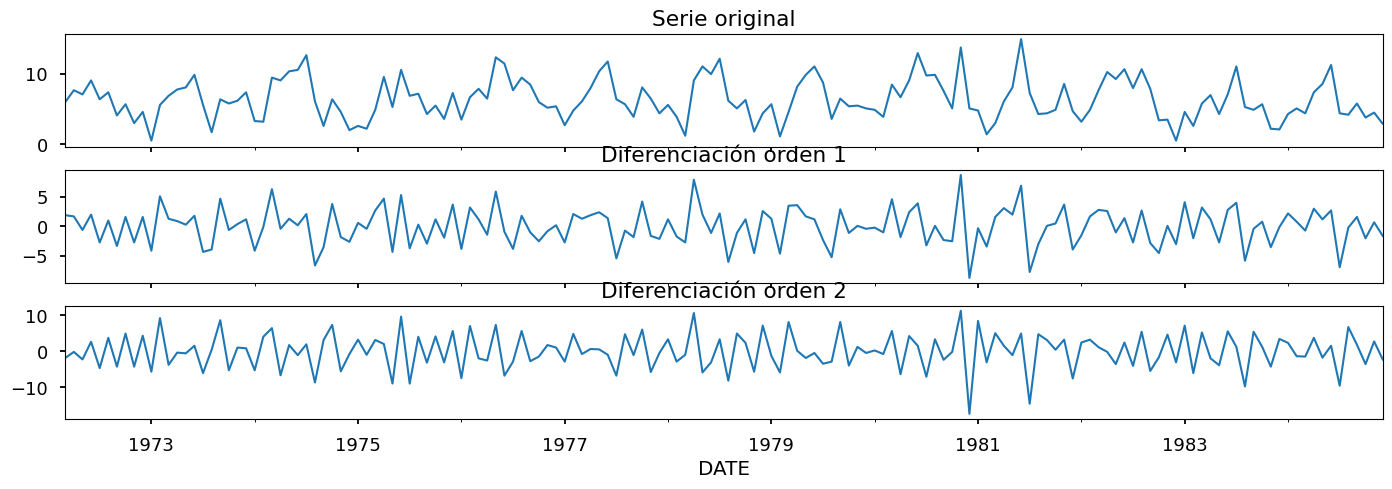

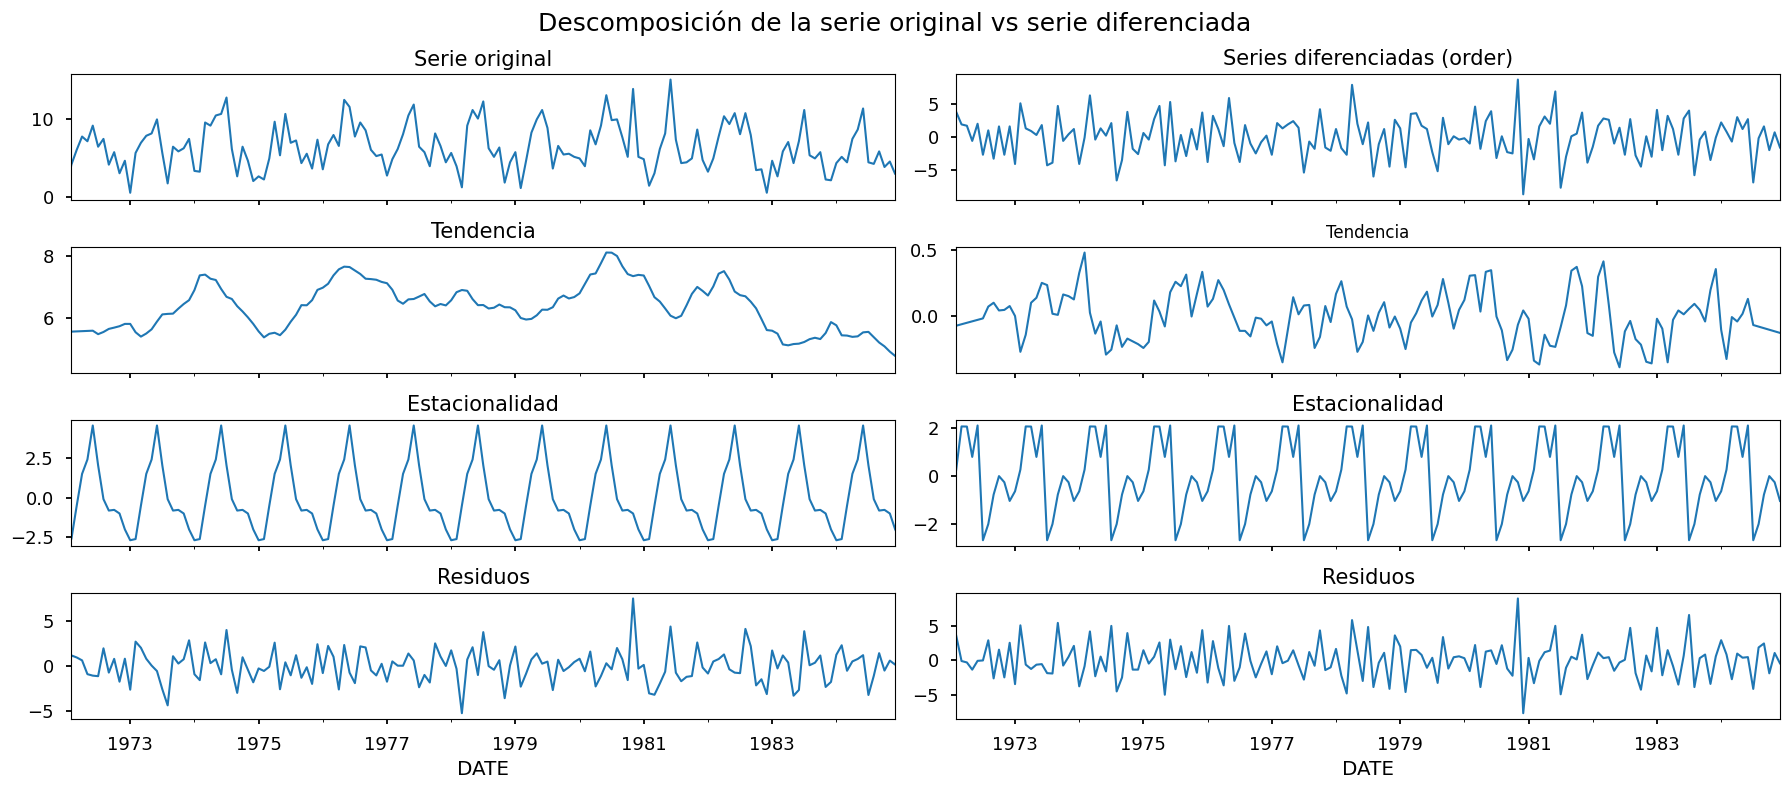

In [16]:
data = pd.read_csv("25044_daily.csv",
                   index_col="DATE",
                   parse_dates=True)
dataset = data.loc[:, ["Year","Month","EVAP","PRECIP","TMAX","TMIN"]]


#data = dataset[dataset.Year.isin( [1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982])]
data = dataset[dataset.Year.isin( [1972,1973,1974,1975,1976,1977,1978,1979,1980,
                                   1981,1982,1983,1984,1985])]

#data = dataset[dataset.Year.isin( [1972,1973,1974,1975,1976,1977])]
#data = dataset[dataset.Year.isin( [1972,1973,1974])]

data.index = pd.to_datetime(data.index,
                            format = "%d/%m/%Y") 
data = data.asfreq("MS")
from sktime.forecasting.model_selection import temporal_train_test_split
y_train,y_test=temporal_train_test_split(data['EVAP'],test_size=9)

#Test estacionariedad
# ==============================================================================
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import kpss
warnings.filterwarnings("ignore")

datos_diff_1 = y_train.diff().dropna()
datos_diff_2 = datos_diff_1.diff().dropna()

print('Test estacionariedad serie original')
print('-------------------------------------')
adfuller_result = adfuller(data['EVAP'])
kpss_result = kpss(data['EVAP'])
print(f'ADF Statistic: {adfuller_result[0]}, p-value: {adfuller_result[1]}')
print(f'KPSS Statistic: {kpss_result[0]}, p-value: {kpss_result[1]}')

print('\nTest estacionariedad para serie diferenciada (order=1)')
print('--------------------------------------------------')
adfuller_result = adfuller(datos_diff_1)
kpss_result = kpss(data['EVAP'].diff().dropna())
print(f'ADF Statistic: {adfuller_result[0]}, p-value: {adfuller_result[1]}')
print(f'KPSS Statistic: {kpss_result[0]}, p-value: {kpss_result[1]}')

print('\nTest estacionariedad para serie diferenciada (order=2)')
print('--------------------------------------------------')
adfuller_result = adfuller(datos_diff_2)
kpss_result = kpss(data['EVAP'].diff().diff().dropna())
print(f'ADF Statistic: {adfuller_result[0]}, p-value: {adfuller_result[1]}')
print(f'KPSS Statistic: {kpss_result[0]}, p-value: {kpss_result[1]}')

warnings.filterwarnings("default")
# Gráfico series
# ==============================================================================
fig, axs = plt.subplots(nrows=3, ncols=1, figsize=(17, 5), sharex=True)
data['EVAP'].plot(ax=axs[0], title='Serie original')
datos_diff_1.plot(ax=axs[1], title='Diferenciación orden 1')
datos_diff_2.plot(ax=axs[2], title='Diferenciación orden 2');

# Descomposición de la serie original y la serie diferenciada
# ==============================================================================
#library

from statsmodels.tsa.seasonal import seasonal_decompose
res_decompose_evap = seasonal_decompose(data['EVAP'], model='additive', extrapolate_trend='freq')
res_descompose_diff_2_evap = seasonal_decompose(datos_diff_1, model='additive', extrapolate_trend='freq')

fig, axs = plt.subplots(nrows=4, ncols=2, figsize=(18, 8), sharex=True)
res_decompose_evap.observed.plot(ax=axs[0, 0])
axs[0, 0].set_title('Serie original', fontsize=15)
res_decompose_evap.trend.plot(ax=axs[1, 0])
axs[1, 0].set_title('Tendencia', fontsize=15)
res_decompose_evap.seasonal.plot(ax=axs[2, 0])
axs[2, 0].set_title('Estacionalidad', fontsize=15)
res_decompose_evap.resid.plot(ax=axs[3, 0])
axs[3, 0].set_title('Residuos', fontsize=15)
res_descompose_diff_2_evap.observed.plot(ax=axs[0, 1])
axs[0, 1].set_title('Series diferenciadas (order)', fontsize=15)
res_descompose_diff_2_evap.trend.plot(ax=axs[1, 1])
axs[1, 1].set_title('Tendencia', fontsize=12)
res_descompose_diff_2_evap.seasonal.plot(ax=axs[2, 1])
axs[2, 1].set_title('Estacionalidad', fontsize=15)
res_descompose_diff_2_evap.resid.plot(ax=axs[3, 1])
axs[3, 1].set_title('Residuos', fontsize=15)
fig.suptitle('Descomposición de la serie original vs serie diferenciada', fontsize=18)
fig.tight_layout();

Test estacionariedad serie original
-------------------------------------
ADF Statistic: -0.7597610125317523, p-value: 0.8306572414627944
KPSS Statistic: 0.493806596450054, p-value: 0.04306157737611397

Test estacionariedad para serie diferenciada (order=1)
--------------------------------------------------
ADF Statistic: 0.3423301921586388, p-value: 0.9792053635395495
KPSS Statistic: 0.4036407086445846, p-value: 0.07558590144629973

Test estacionariedad para serie diferenciada (order=2)
--------------------------------------------------
ADF Statistic: -2.6592514864964047, p-value: 0.08135883227942137
KPSS Statistic: 0.3550383164770424, p-value: 0.09653520841506792


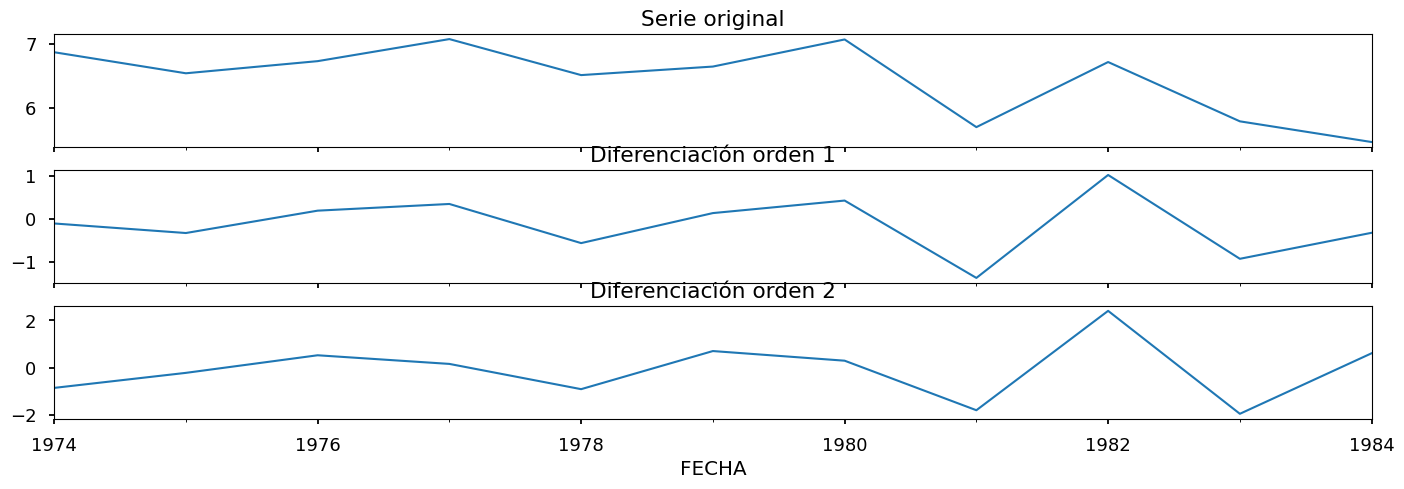

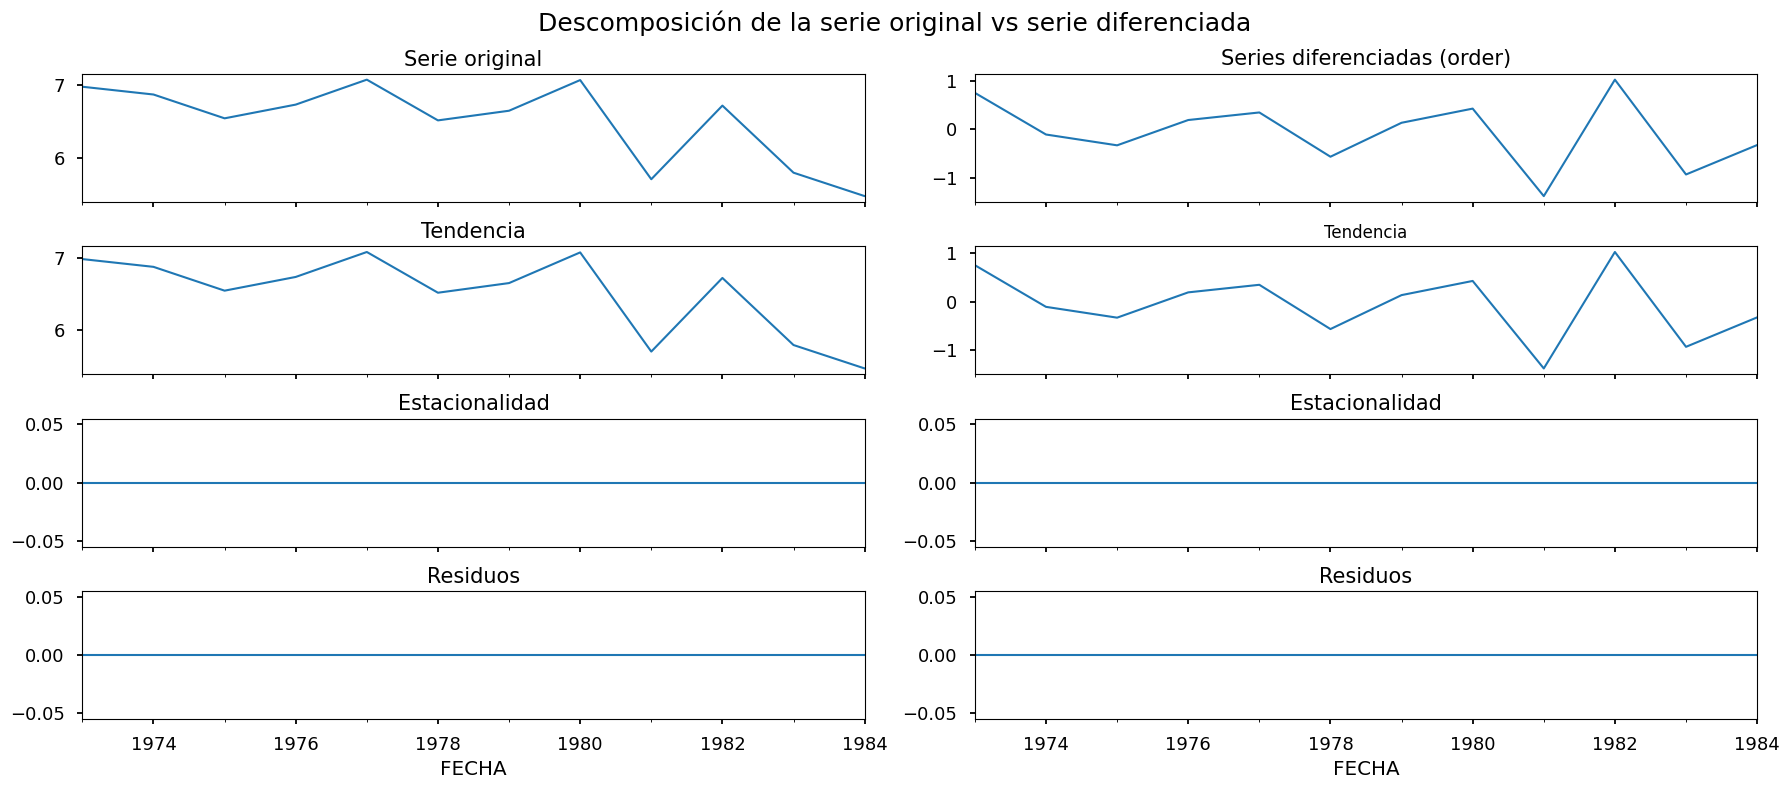

In [25]:
data = pd.read_csv("25044_anual.csv",
                   index_col="FECHA",
                   parse_dates=True)
dataset = data.loc[:, ["Year","EVAP","PRECIP","TMAX","TMIN"]]


#data = dataset[dataset.Year.isin( [1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982])]
data = dataset[dataset.Year.isin( [1972,1973,1974,1975,1976,1977,1978,1979,1980,
                                   1981,1982,1983,1984,1985])]

#data = dataset[dataset.Year.isin( [1972,1973,1974,1975,1976,1977])]
#data = dataset[dataset.Year.isin( [1972,1973,1974])]

data.index = pd.to_datetime(data.index,
                            format = "%d/%m/%Y") 
#data = data.asfreq("Y")
from sktime.forecasting.model_selection import temporal_train_test_split
y_train,y_test=temporal_train_test_split(data['EVAP'],test_size=1)

#Test estacionariedad
# ==============================================================================
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import kpss
warnings.filterwarnings("ignore")

datos_diff_1 = y_train.diff().dropna()
datos_diff_2 = datos_diff_1.diff().dropna()

print('Test estacionariedad serie original')
print('-------------------------------------')
adfuller_result = adfuller(data['EVAP'])
kpss_result = kpss(data['EVAP'])
print(f'ADF Statistic: {adfuller_result[0]}, p-value: {adfuller_result[1]}')
print(f'KPSS Statistic: {kpss_result[0]}, p-value: {kpss_result[1]}')

print('\nTest estacionariedad para serie diferenciada (order=1)')
print('--------------------------------------------------')
adfuller_result = adfuller(datos_diff_1)
kpss_result = kpss(data['EVAP'].diff().dropna())
print(f'ADF Statistic: {adfuller_result[0]}, p-value: {adfuller_result[1]}')
print(f'KPSS Statistic: {kpss_result[0]}, p-value: {kpss_result[1]}')

print('\nTest estacionariedad para serie diferenciada (order=2)')
print('--------------------------------------------------')
adfuller_result = adfuller(datos_diff_2)
kpss_result = kpss(data['EVAP'].diff().diff().dropna())
print(f'ADF Statistic: {adfuller_result[0]}, p-value: {adfuller_result[1]}')
print(f'KPSS Statistic: {kpss_result[0]}, p-value: {kpss_result[1]}')

warnings.filterwarnings("default")
# Gráfico series
# ==============================================================================
fig, axs = plt.subplots(nrows=3, ncols=1, figsize=(17, 5), sharex=True)
data['EVAP'].plot(ax=axs[0], title='Serie original')
datos_diff_1.plot(ax=axs[1], title='Diferenciación orden 1')
datos_diff_2.plot(ax=axs[2], title='Diferenciación orden 2');

# Descomposición de la serie original y la serie diferenciada
# ==============================================================================
#library

from statsmodels.tsa.seasonal import seasonal_decompose
res_decompose_evap = seasonal_decompose(data['EVAP'], model='additive', extrapolate_trend='freq')
res_descompose_diff_2_evap = seasonal_decompose(datos_diff_1, model='additive', extrapolate_trend='freq')

fig, axs = plt.subplots(nrows=4, ncols=2, figsize=(18, 8), sharex=True)
res_decompose_evap.observed.plot(ax=axs[0, 0])
axs[0, 0].set_title('Serie original', fontsize=15)
res_decompose_evap.trend.plot(ax=axs[1, 0])
axs[1, 0].set_title('Tendencia', fontsize=15)
res_decompose_evap.seasonal.plot(ax=axs[2, 0])
axs[2, 0].set_title('Estacionalidad', fontsize=15)
res_decompose_evap.resid.plot(ax=axs[3, 0])
axs[3, 0].set_title('Residuos', fontsize=15)
res_descompose_diff_2_evap.observed.plot(ax=axs[0, 1])
axs[0, 1].set_title('Series diferenciadas (order)', fontsize=15)
res_descompose_diff_2_evap.trend.plot(ax=axs[1, 1])
axs[1, 1].set_title('Tendencia', fontsize=12)
res_descompose_diff_2_evap.seasonal.plot(ax=axs[2, 1])
axs[2, 1].set_title('Estacionalidad', fontsize=15)
res_descompose_diff_2_evap.resid.plot(ax=axs[3, 1])
axs[3, 1].set_title('Residuos', fontsize=15)
fig.suptitle('Descomposición de la serie original vs serie diferenciada', fontsize=18)
fig.tight_layout();

c:\Users\ZM\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\model_selection\__init__.py:36: DeprecationWarning: WARNING - the old location of temporal_train_test_split in sktime.forecasting.model_selection is deprecated and is scheduled for imminent removal in a MINOR version. Please update any import statements to from sktime.split import temporal_train_test_split.
  warn(


Test estacionariedad serie original
-------------------------------------
ADF Statistic: -3.5649959527009565, p-value: 0.006466590658335917
KPSS Statistic: 0.15972231555406433, p-value: 0.1

Test estacionariedad para serie diferenciada (order=1)
--------------------------------------------------
ADF Statistic: -9.798154367951906, p-value: 6.095497057344868e-17
KPSS Statistic: 0.07525139377575905, p-value: 0.1

Test estacionariedad para serie diferenciada (order=2)
--------------------------------------------------
ADF Statistic: -10.531525555526787, p-value: 9.125432266125088e-19
KPSS Statistic: 0.1904286175640335, p-value: 0.1


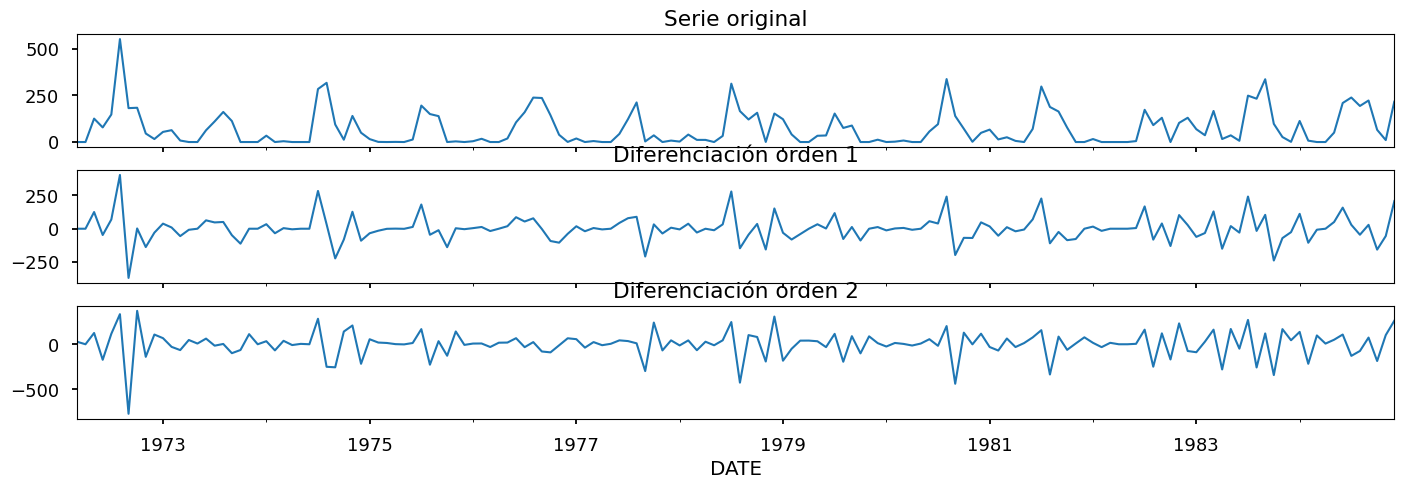

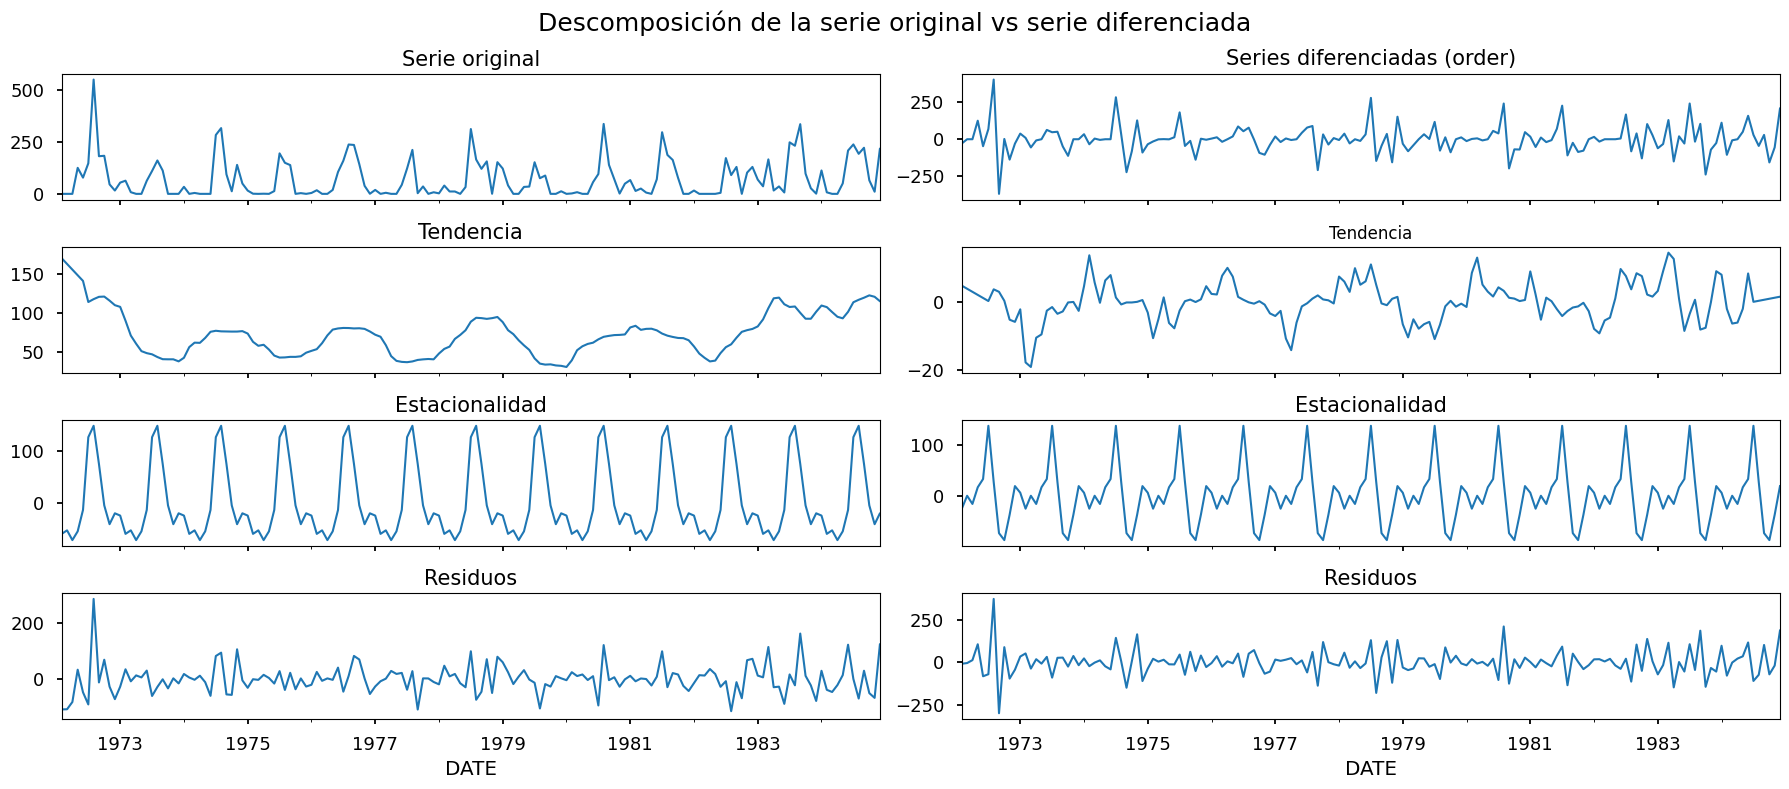

In [13]:

#get the data
data = pd.read_csv("25044_mens.csv",
                   index_col="DATE",
                   parse_dates=True)
#dataset = data.loc[:, ["Year","Month","EVAP","PRECIP","TMAX","TMIN"]]
#data = dataset[dataset.Year.isin( [1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982])]
#data = dataset[dataset.Year.isin( [1972,1973,1974])]
data = dataset[dataset.Year.isin( [1972,1973,1974,1975,1976,1977,1978,1979,1980,
                                   1981,1982,1983,1984,1985])]
data.index = pd.to_datetime(data.index,
                            format = "%d/%m/%Y") 
data = data.asfreq("MS")
from sktime.forecasting.model_selection import temporal_train_test_split
y_train,y_test=temporal_train_test_split(data['PRECIP'],test_size=9)
#Test estacionariedad
# ==============================================================================
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import kpss
warnings.filterwarnings("ignore")

datos_diff_1 = y_train.diff().dropna()
datos_diff_2 = datos_diff_1.diff().dropna()

print('Test estacionariedad serie original')
print('-------------------------------------')
adfuller_result = adfuller(data['PRECIP'])
kpss_result = kpss(data['PRECIP'])
print(f'ADF Statistic: {adfuller_result[0]}, p-value: {adfuller_result[1]}')
print(f'KPSS Statistic: {kpss_result[0]}, p-value: {kpss_result[1]}')

print('\nTest estacionariedad para serie diferenciada (order=1)')
print('--------------------------------------------------')
adfuller_result = adfuller(datos_diff_1)
kpss_result = kpss(data['PRECIP'].diff().dropna())
print(f'ADF Statistic: {adfuller_result[0]}, p-value: {adfuller_result[1]}')
print(f'KPSS Statistic: {kpss_result[0]}, p-value: {kpss_result[1]}')

print('\nTest estacionariedad para serie diferenciada (order=2)')
print('--------------------------------------------------')
adfuller_result = adfuller(datos_diff_2)
kpss_result = kpss(data['PRECIP'].diff().diff().dropna())
print(f'ADF Statistic: {adfuller_result[0]}, p-value: {adfuller_result[1]}')
print(f'KPSS Statistic: {kpss_result[0]}, p-value: {kpss_result[1]}')

warnings.filterwarnings("default")
# Gráfico series
# ==============================================================================
fig, axs = plt.subplots(nrows=3, ncols=1, figsize=(17, 5), sharex=True)
data['PRECIP'].plot(ax=axs[0], title='Serie original')
datos_diff_1.plot(ax=axs[1], title='Diferenciación orden 1')
datos_diff_2.plot(ax=axs[2], title='Diferenciación orden 2');

# Descomposición de la serie original y la serie diferenciada
# ==============================================================================
#library

from statsmodels.tsa.seasonal import seasonal_decompose
res_decompose_precip = seasonal_decompose(data['PRECIP'], model='additive', extrapolate_trend='freq')
res_descompose_diff_2_precip = seasonal_decompose(datos_diff_1, model='additive', extrapolate_trend='freq')

fig, axs = plt.subplots(nrows=4, ncols=2, figsize=(18, 8), sharex=True)
res_decompose_precip.observed.plot(ax=axs[0, 0])
axs[0, 0].set_title('Serie original', fontsize=15)
res_decompose_precip.trend.plot(ax=axs[1, 0])
axs[1, 0].set_title('Tendencia', fontsize=15)
res_decompose_precip.seasonal.plot(ax=axs[2, 0])
axs[2, 0].set_title('Estacionalidad', fontsize=15)
res_decompose_precip.resid.plot(ax=axs[3, 0])
axs[3, 0].set_title('Residuos', fontsize=15)
res_descompose_diff_2_precip.observed.plot(ax=axs[0, 1])
axs[0, 1].set_title('Series diferenciadas (order)', fontsize=15)
res_descompose_diff_2_precip.trend.plot(ax=axs[1, 1])
axs[1, 1].set_title('Tendencia', fontsize=12)
res_descompose_diff_2_precip.seasonal.plot(ax=axs[2, 1])
axs[2, 1].set_title('Estacionalidad', fontsize=15)
res_descompose_diff_2_precip.resid.plot(ax=axs[3, 1])
axs[3, 1].set_title('Residuos', fontsize=15)
fig.suptitle('Descomposición de la serie original vs serie diferenciada', fontsize=18)
fig.tight_layout();

c:\Users\ZM\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\model_selection\__init__.py:36: DeprecationWarning: WARNING - the old location of temporal_train_test_split in sktime.forecasting.model_selection is deprecated and is scheduled for imminent removal in a MINOR version. Please update any import statements to from sktime.split import temporal_train_test_split.
  warn(


Test estacionariedad serie original
-------------------------------------
ADF Statistic: -10.031209048530277, p-value: 1.583238282121528e-17
KPSS Statistic: 0.23239541818020584, p-value: 0.1

Test estacionariedad para serie diferenciada (order=1)
--------------------------------------------------
ADF Statistic: -8.314825602688138, p-value: 3.7049960344976084e-13
KPSS Statistic: 0.5000000000000019, p-value: 0.04166666666666624

Test estacionariedad para serie diferenciada (order=2)
--------------------------------------------------
ADF Statistic: -7.294635244474544, p-value: 1.3882560574458507e-10
KPSS Statistic: 0.5000000000000188, p-value: 0.041666666666662446


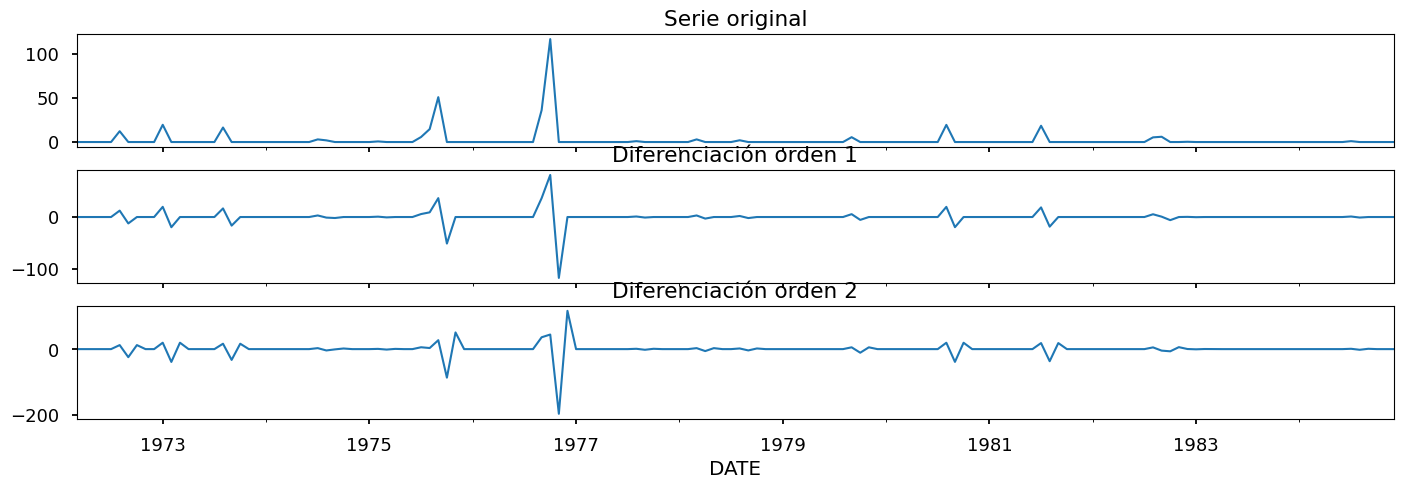

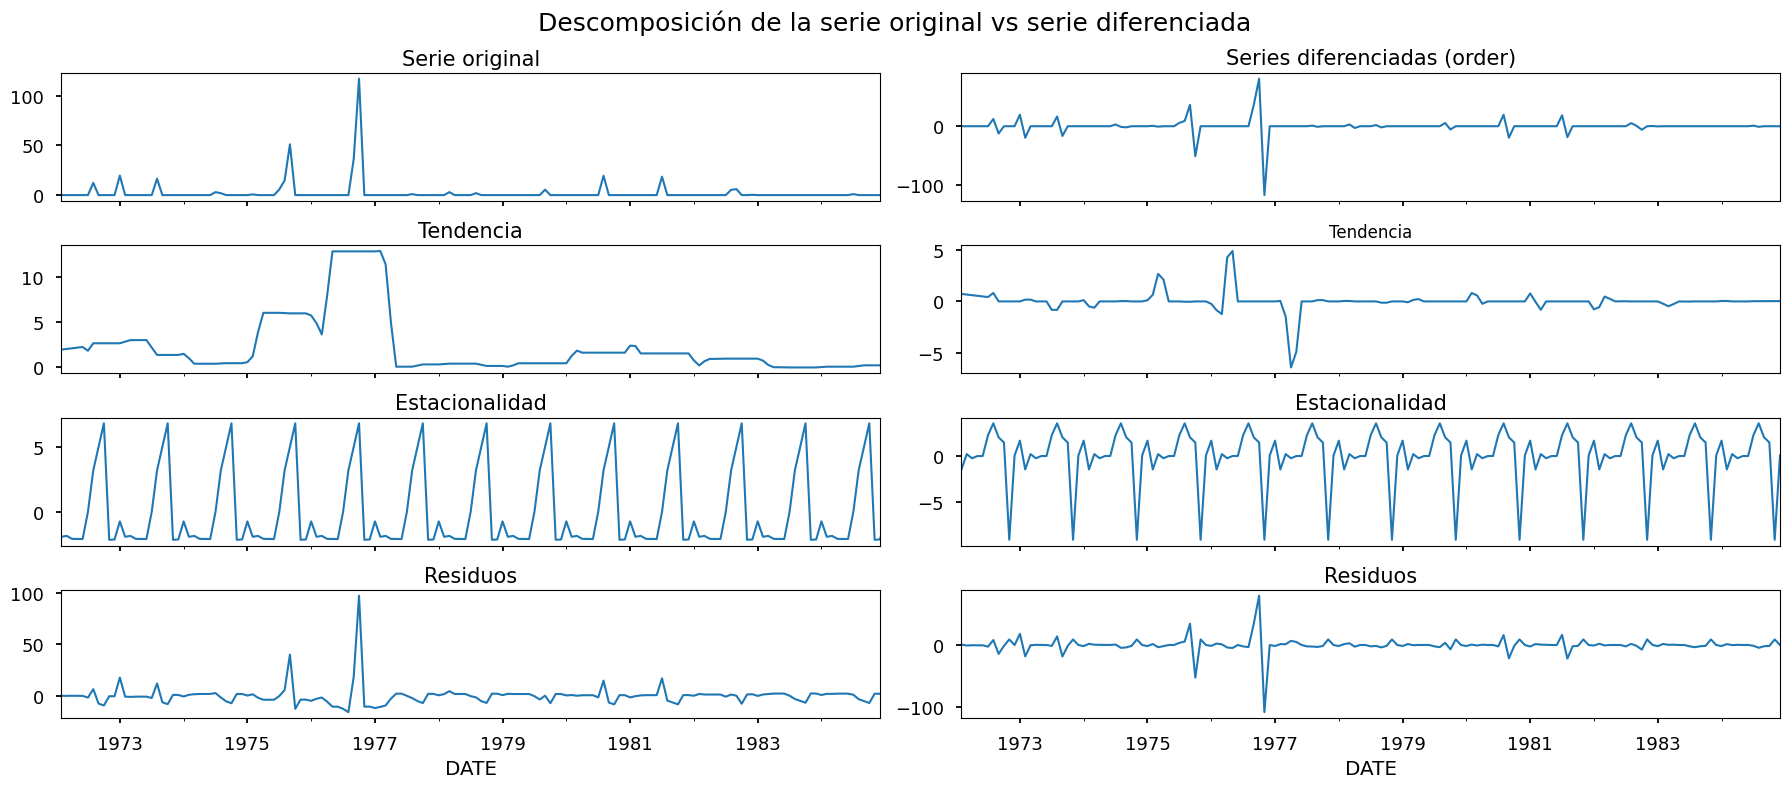

In [17]:
#get the data
data = pd.read_csv("25044_daily.csv",
                   index_col="DATE",
                   parse_dates=True)
#dataset = data.loc[:, ["Year","Month","EVAP","PRECIP","TMAX","TMIN"]]
#data = dataset[dataset.Year.isin( [1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982])]
#data = dataset[dataset.Year.isin( [1972,1973,1974])]
data = dataset[dataset.Year.isin( [1972,1973,1974,1975,1976,1977,1978,1979,1980,
                                   1981,1982,1983,1984,1985])]
data.index = pd.to_datetime(data.index,
                            format = "%d/%m/%Y") 
data = data.asfreq("MS")
from sktime.forecasting.model_selection import temporal_train_test_split
y_train,y_test=temporal_train_test_split(data['PRECIP'],test_size=9)
#Test estacionariedad
# ==============================================================================
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import kpss
warnings.filterwarnings("ignore")

datos_diff_1 = y_train.diff().dropna()
datos_diff_2 = datos_diff_1.diff().dropna()

print('Test estacionariedad serie original')
print('-------------------------------------')
adfuller_result = adfuller(data['PRECIP'])
kpss_result = kpss(data['PRECIP'])
print(f'ADF Statistic: {adfuller_result[0]}, p-value: {adfuller_result[1]}')
print(f'KPSS Statistic: {kpss_result[0]}, p-value: {kpss_result[1]}')

print('\nTest estacionariedad para serie diferenciada (order=1)')
print('--------------------------------------------------')
adfuller_result = adfuller(datos_diff_1)
kpss_result = kpss(data['PRECIP'].diff().dropna())
print(f'ADF Statistic: {adfuller_result[0]}, p-value: {adfuller_result[1]}')
print(f'KPSS Statistic: {kpss_result[0]}, p-value: {kpss_result[1]}')

print('\nTest estacionariedad para serie diferenciada (order=2)')
print('--------------------------------------------------')
adfuller_result = adfuller(datos_diff_2)
kpss_result = kpss(data['PRECIP'].diff().diff().dropna())
print(f'ADF Statistic: {adfuller_result[0]}, p-value: {adfuller_result[1]}')
print(f'KPSS Statistic: {kpss_result[0]}, p-value: {kpss_result[1]}')

warnings.filterwarnings("default")
# Gráfico series
# ==============================================================================
fig, axs = plt.subplots(nrows=3, ncols=1, figsize=(17, 5), sharex=True)
data['PRECIP'].plot(ax=axs[0], title='Serie original')
datos_diff_1.plot(ax=axs[1], title='Diferenciación orden 1')
datos_diff_2.plot(ax=axs[2], title='Diferenciación orden 2');

# Descomposición de la serie original y la serie diferenciada
# ==============================================================================
#library

from statsmodels.tsa.seasonal import seasonal_decompose
res_decompose_precip = seasonal_decompose(data['PRECIP'], model='additive', extrapolate_trend='freq')
res_descompose_diff_2_precip = seasonal_decompose(datos_diff_1, model='additive', extrapolate_trend='freq')

fig, axs = plt.subplots(nrows=4, ncols=2, figsize=(18, 8), sharex=True)
res_decompose_precip.observed.plot(ax=axs[0, 0])
axs[0, 0].set_title('Serie original', fontsize=15)
res_decompose_precip.trend.plot(ax=axs[1, 0])
axs[1, 0].set_title('Tendencia', fontsize=15)
res_decompose_precip.seasonal.plot(ax=axs[2, 0])
axs[2, 0].set_title('Estacionalidad', fontsize=15)
res_decompose_precip.resid.plot(ax=axs[3, 0])
axs[3, 0].set_title('Residuos', fontsize=15)
res_descompose_diff_2_precip.observed.plot(ax=axs[0, 1])
axs[0, 1].set_title('Series diferenciadas (order)', fontsize=15)
res_descompose_diff_2_precip.trend.plot(ax=axs[1, 1])
axs[1, 1].set_title('Tendencia', fontsize=12)
res_descompose_diff_2_precip.seasonal.plot(ax=axs[2, 1])
axs[2, 1].set_title('Estacionalidad', fontsize=15)
res_descompose_diff_2_precip.resid.plot(ax=axs[3, 1])
axs[3, 1].set_title('Residuos', fontsize=15)
fig.suptitle('Descomposición de la serie original vs serie diferenciada', fontsize=18)
fig.tight_layout();

c:\Users\ZM\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\model_selection\__init__.py:36: DeprecationWarning: WARNING - the old location of temporal_train_test_split in sktime.forecasting.model_selection is deprecated and is scheduled for imminent removal in a MINOR version. Please update any import statements to from sktime.split import temporal_train_test_split.
  warn(


Test estacionariedad serie original
-------------------------------------
ADF Statistic: -0.543063709948018, p-value: 0.8833354507623208
KPSS Statistic: 0.23221460676319108, p-value: 0.1

Test estacionariedad para serie diferenciada (order=1)
--------------------------------------------------
ADF Statistic: 1.2351038548782203, p-value: 0.996219666435213
KPSS Statistic: 0.30594630572242537, p-value: 0.1

Test estacionariedad para serie diferenciada (order=2)
--------------------------------------------------
ADF Statistic: 0.34172449964124124, p-value: 0.9791798526651101
KPSS Statistic: 0.36039935186461675, p-value: 0.09422441729973416


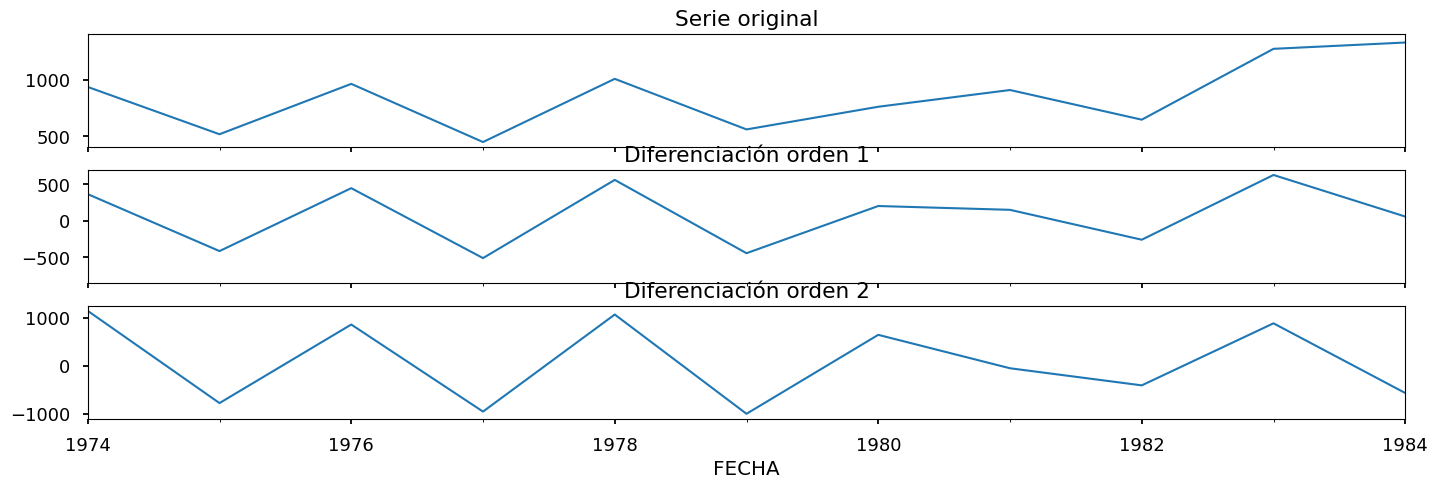

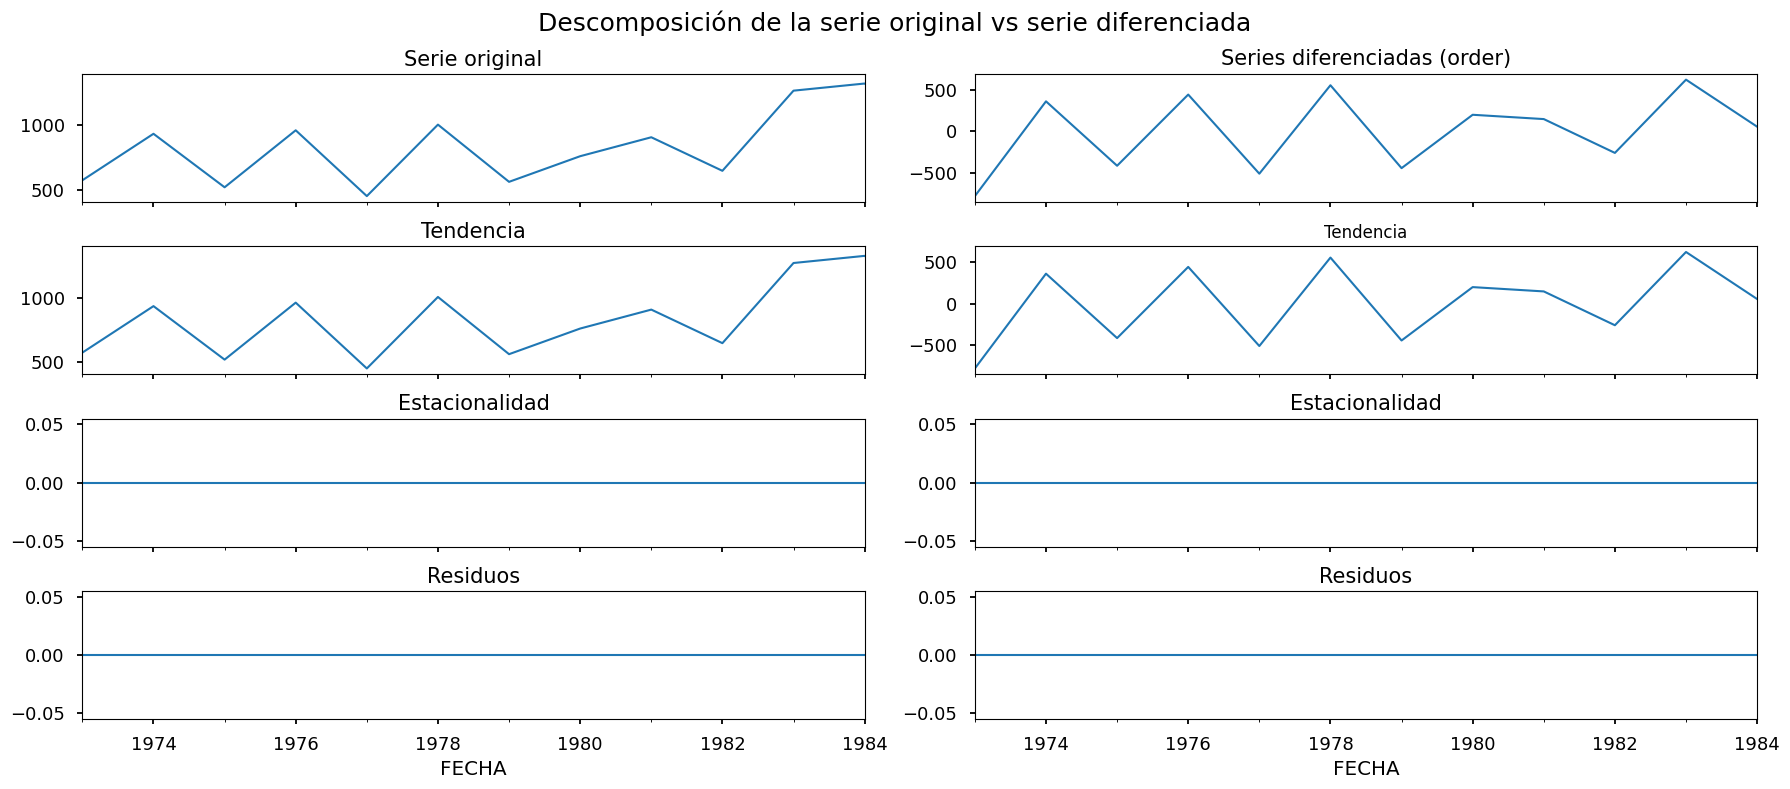

In [27]:
#get the data
data = pd.read_csv("25044_anual.csv",
                   index_col="FECHA",
                   parse_dates=True)
#dataset = data.loc[:, ["Year","Month","EVAP","PRECIP","TMAX","TMIN"]]
#data = dataset[dataset.Year.isin( [1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982])]
#data = dataset[dataset.Year.isin( [1972,1973,1974])]
data = dataset[dataset.Year.isin( [1972,1973,1974,1975,1976,1977,1978,1979,1980,
                                   1981,1982,1983,1984,1985])]
data.index = pd.to_datetime(data.index,
                            format = "%d/%m/%Y") 
#data = data.asfreq("MS")
from sktime.forecasting.model_selection import temporal_train_test_split
y_train,y_test=temporal_train_test_split(data['PRECIP'],test_size=1)
#Test estacionariedad
# ==============================================================================
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import kpss
warnings.filterwarnings("ignore")

datos_diff_1 = y_train.diff().dropna()
datos_diff_2 = datos_diff_1.diff().dropna()

print('Test estacionariedad serie original')
print('-------------------------------------')
adfuller_result = adfuller(data['PRECIP'])
kpss_result = kpss(data['PRECIP'])
print(f'ADF Statistic: {adfuller_result[0]}, p-value: {adfuller_result[1]}')
print(f'KPSS Statistic: {kpss_result[0]}, p-value: {kpss_result[1]}')

print('\nTest estacionariedad para serie diferenciada (order=1)')
print('--------------------------------------------------')
adfuller_result = adfuller(datos_diff_1)
kpss_result = kpss(data['PRECIP'].diff().dropna())
print(f'ADF Statistic: {adfuller_result[0]}, p-value: {adfuller_result[1]}')
print(f'KPSS Statistic: {kpss_result[0]}, p-value: {kpss_result[1]}')

print('\nTest estacionariedad para serie diferenciada (order=2)')
print('--------------------------------------------------')
adfuller_result = adfuller(datos_diff_2)
kpss_result = kpss(data['PRECIP'].diff().diff().dropna())
print(f'ADF Statistic: {adfuller_result[0]}, p-value: {adfuller_result[1]}')
print(f'KPSS Statistic: {kpss_result[0]}, p-value: {kpss_result[1]}')

warnings.filterwarnings("default")
# Gráfico series
# ==============================================================================
fig, axs = plt.subplots(nrows=3, ncols=1, figsize=(17, 5), sharex=True)
data['PRECIP'].plot(ax=axs[0], title='Serie original')
datos_diff_1.plot(ax=axs[1], title='Diferenciación orden 1')
datos_diff_2.plot(ax=axs[2], title='Diferenciación orden 2');

# Descomposición de la serie original y la serie diferenciada
# ==============================================================================
#library

from statsmodels.tsa.seasonal import seasonal_decompose
res_decompose_precip = seasonal_decompose(data['PRECIP'], model='additive', extrapolate_trend='freq')
res_descompose_diff_2_precip = seasonal_decompose(datos_diff_1, model='additive', extrapolate_trend='freq')

fig, axs = plt.subplots(nrows=4, ncols=2, figsize=(18, 8), sharex=True)
res_decompose_precip.observed.plot(ax=axs[0, 0])
axs[0, 0].set_title('Serie original', fontsize=15)
res_decompose_precip.trend.plot(ax=axs[1, 0])
axs[1, 0].set_title('Tendencia', fontsize=15)
res_decompose_precip.seasonal.plot(ax=axs[2, 0])
axs[2, 0].set_title('Estacionalidad', fontsize=15)
res_decompose_precip.resid.plot(ax=axs[3, 0])
axs[3, 0].set_title('Residuos', fontsize=15)
res_descompose_diff_2_precip.observed.plot(ax=axs[0, 1])
axs[0, 1].set_title('Series diferenciadas (order)', fontsize=15)
res_descompose_diff_2_precip.trend.plot(ax=axs[1, 1])
axs[1, 1].set_title('Tendencia', fontsize=12)
res_descompose_diff_2_precip.seasonal.plot(ax=axs[2, 1])
axs[2, 1].set_title('Estacionalidad', fontsize=15)
res_descompose_diff_2_precip.resid.plot(ax=axs[3, 1])
axs[3, 1].set_title('Residuos', fontsize=15)
fig.suptitle('Descomposición de la serie original vs serie diferenciada', fontsize=18)
fig.tight_layout();

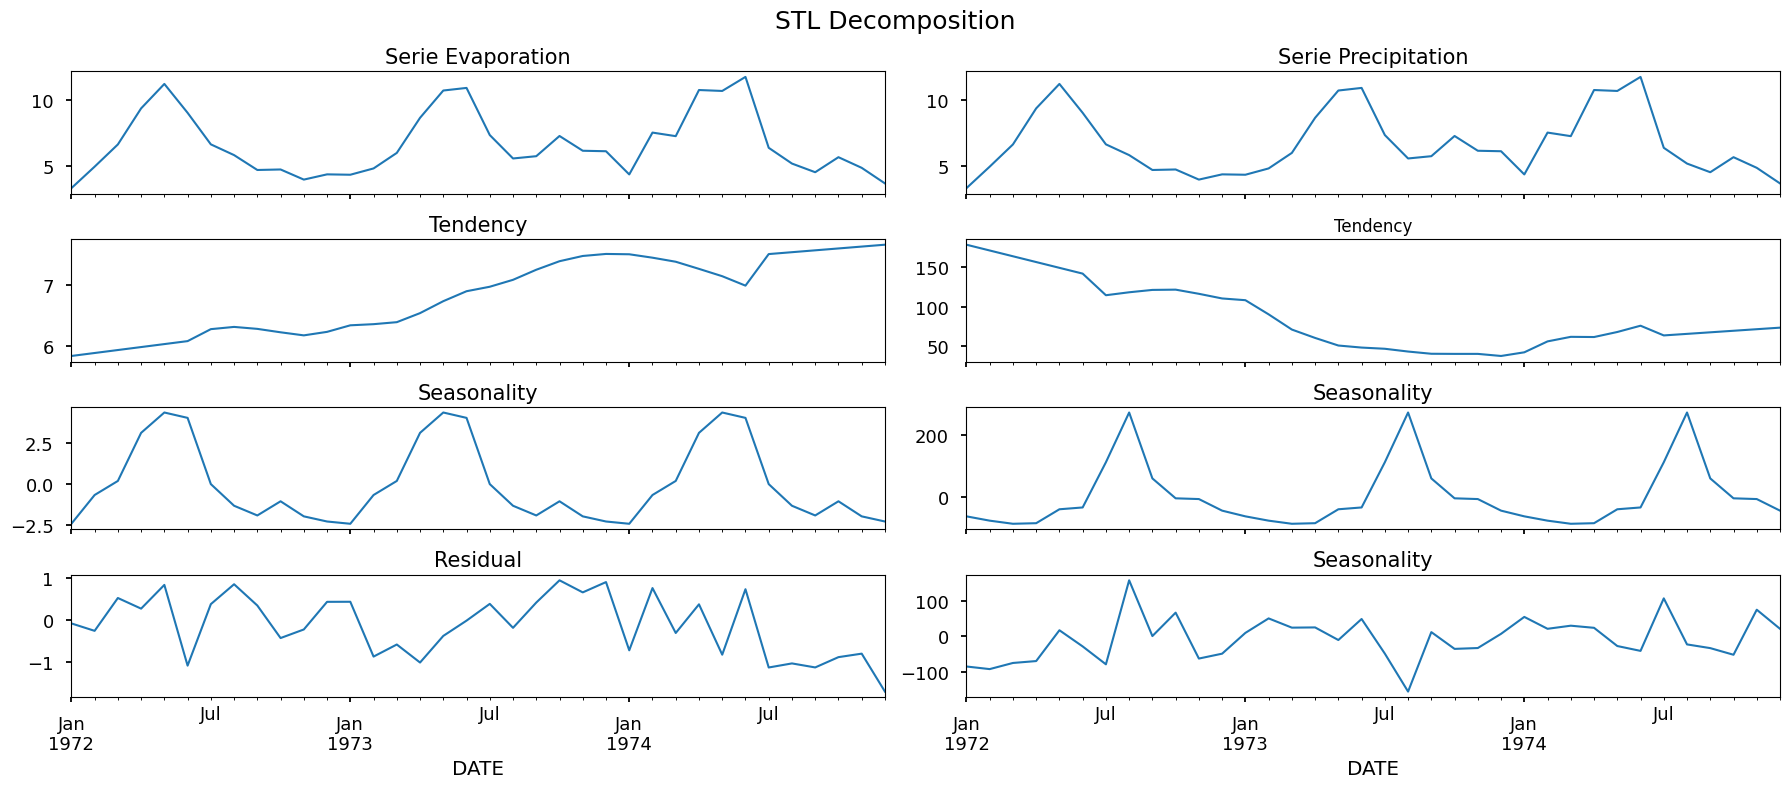

In [11]:
fig, axs = plt.subplots(nrows=4, ncols=2, figsize=(18, 8), sharex=True)
res_decompose_evap.observed.plot(ax=axs[0, 0])
axs[0, 0].set_title('Serie Evaporation', fontsize=15)
res_decompose_evap.trend.plot(ax=axs[1, 0])
axs[1, 0].set_title('Tendency', fontsize=15)
res_decompose_evap.seasonal.plot(ax=axs[2, 0])
axs[2, 0].set_title('Seasonality', fontsize=15)
res_decompose_evap.resid.plot(ax=axs[3, 0])
axs[3, 0].set_title('Residual', fontsize=15)
res_decompose_evap.observed.plot(ax=axs[0, 1])
axs[0, 1].set_title('Serie Precipitation', fontsize=15)
res_decompose_precip.trend.plot(ax=axs[1, 1])
axs[1, 1].set_title('Tendency', fontsize=12)
res_decompose_precip.seasonal.plot(ax=axs[2, 1])
axs[2, 1].set_title('Seasonality', fontsize=15)
res_decompose_precip.resid.plot(ax=axs[3, 1])
axs[3, 1].set_title('Seasonality', fontsize=15)
fig.suptitle('STL Decomposition', fontsize=18)
fig.tight_layout();

c:\Users\ZM\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\model_selection\__init__.py:36: DeprecationWarning: WARNING - the old location of temporal_train_test_split in sktime.forecasting.model_selection is deprecated and is scheduled for imminent removal in a MINOR version. Please update any import statements to from sktime.split import temporal_train_test_split.
  warn(


Test estacionariedad serie original
-------------------------------------
ADF Statistic: -3.2479359780897954, p-value: 0.01737231020351516
KPSS Statistic: 0.029030703370851035, p-value: 0.1

Test estacionariedad para serie diferenciada (order=1)
--------------------------------------------------
ADF Statistic: -9.47207368852874, p-value: 4.080890240261965e-16
KPSS Statistic: 0.018187110589149024, p-value: 0.1

Test estacionariedad para serie diferenciada (order=2)
--------------------------------------------------
ADF Statistic: -8.306759672713826, p-value: 3.88493825641702e-13
KPSS Statistic: 0.22170509001937141, p-value: 0.1


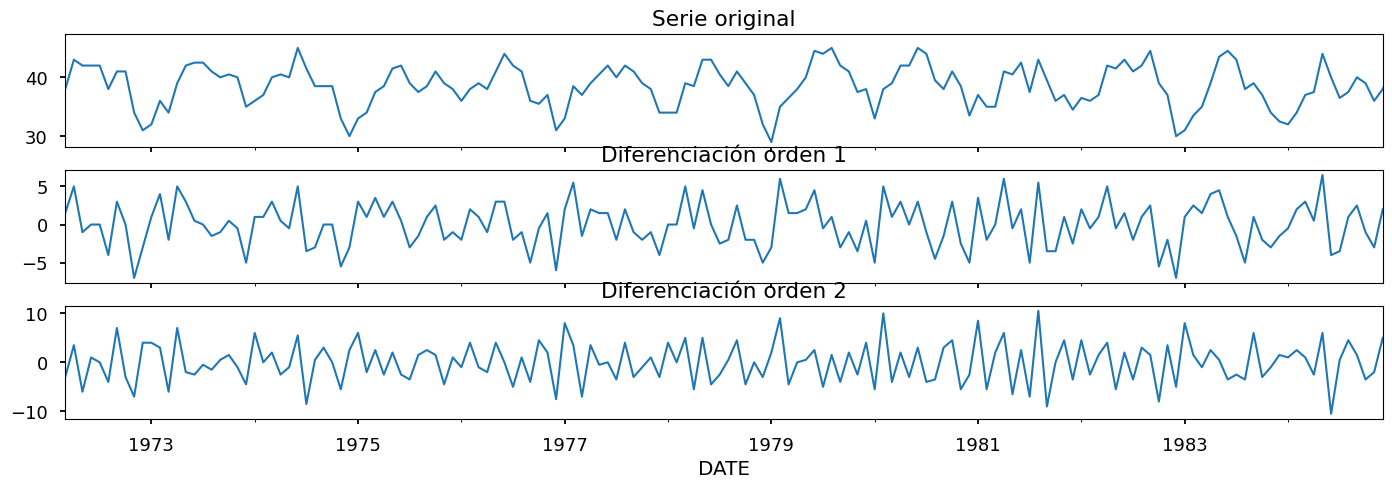

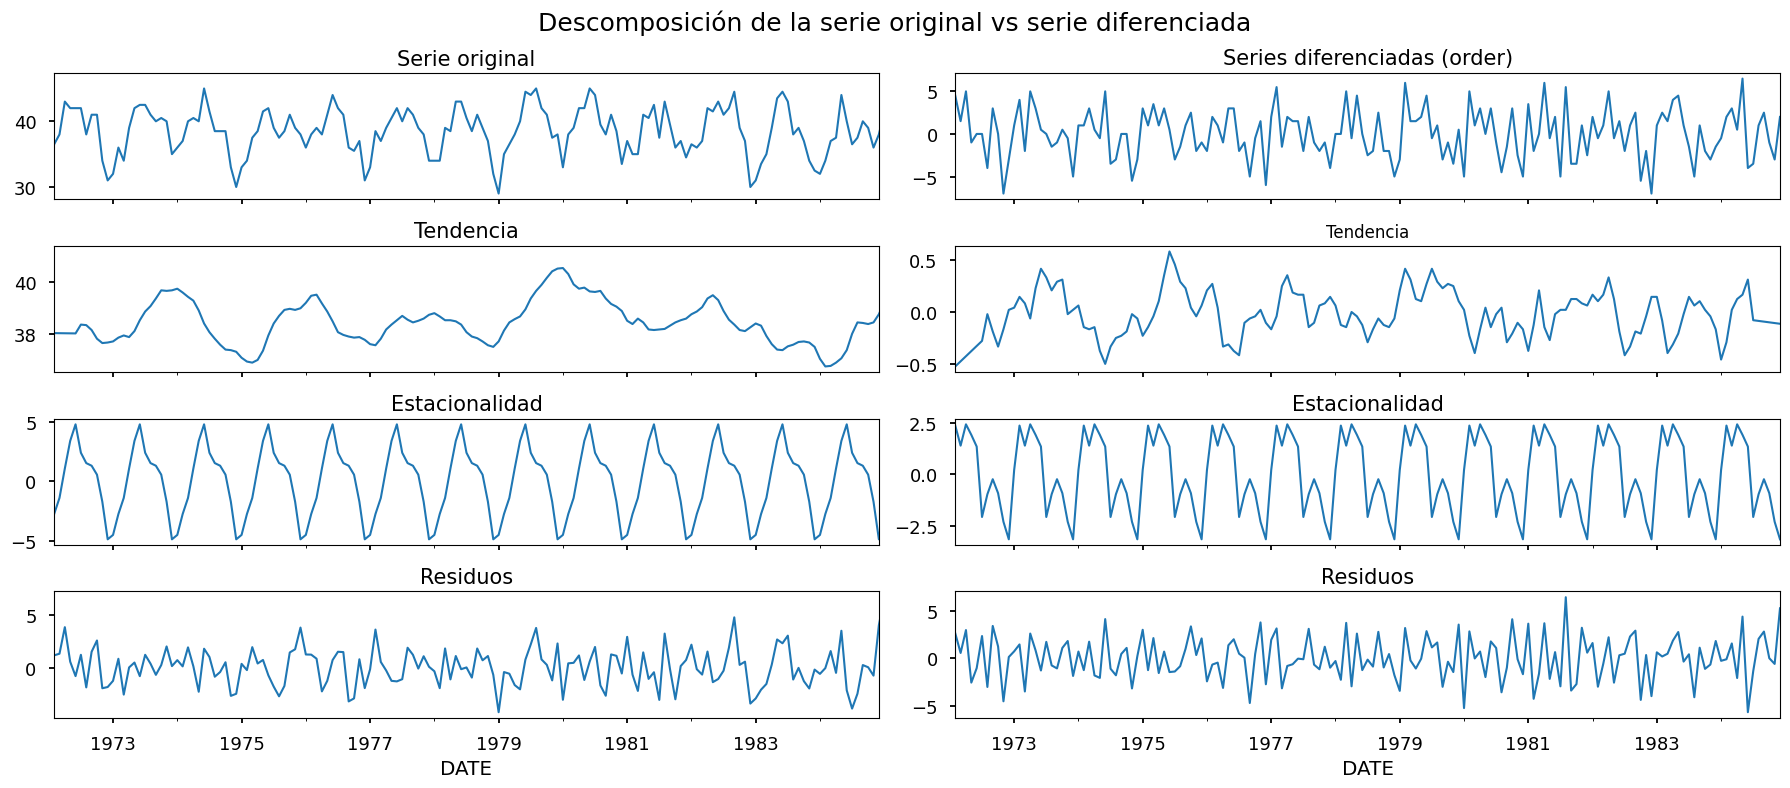

In [14]:
#get the data
data = pd.read_csv("25044_mens.csv",
                   index_col="DATE",
                   parse_dates=True)
dataset = data.loc[:, ["Year","Month","EVAP","PRECIP","TMAX","TMIN"]]

#data = dataset[dataset.Year.isin( [1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984])]
#data = dataset[dataset.Year.isin( [1972,1973,1974])]
data = dataset[dataset.Year.isin( [1972,1973,1974,1975,1976,1977,1978,1979,1980,
                                   1981,1982,1983,1984,1985])]
data.index = pd.to_datetime(data.index,
                            format = "%d/%m/%Y") 
data = data.asfreq("MS")
from sktime.forecasting.model_selection import temporal_train_test_split
y_train,y_test=temporal_train_test_split(data['TMAX'],test_size=9)
#Test estacionariedad
# ==============================================================================
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import kpss
warnings.filterwarnings("ignore")

datos_diff_1 = y_train.diff().dropna()
datos_diff_2 = datos_diff_1.diff().dropna()

print('Test estacionariedad serie original')
print('-------------------------------------')
adfuller_result = adfuller(data['TMAX'])
kpss_result = kpss(data['TMAX'])
print(f'ADF Statistic: {adfuller_result[0]}, p-value: {adfuller_result[1]}')
print(f'KPSS Statistic: {kpss_result[0]}, p-value: {kpss_result[1]}')

print('\nTest estacionariedad para serie diferenciada (order=1)')
print('--------------------------------------------------')
adfuller_result = adfuller(datos_diff_1)
kpss_result = kpss(data['TMAX'].diff().dropna())
print(f'ADF Statistic: {adfuller_result[0]}, p-value: {adfuller_result[1]}')
print(f'KPSS Statistic: {kpss_result[0]}, p-value: {kpss_result[1]}')

print('\nTest estacionariedad para serie diferenciada (order=2)')
print('--------------------------------------------------')
adfuller_result = adfuller(datos_diff_2)
kpss_result = kpss(data['TMAX'].diff().diff().dropna())
print(f'ADF Statistic: {adfuller_result[0]}, p-value: {adfuller_result[1]}')
print(f'KPSS Statistic: {kpss_result[0]}, p-value: {kpss_result[1]}')

warnings.filterwarnings("default")
# Gráfico series
# ==============================================================================
fig, axs = plt.subplots(nrows=3, ncols=1, figsize=(17, 5), sharex=True)
data['TMAX'].plot(ax=axs[0], title='Serie original')
datos_diff_1.plot(ax=axs[1], title='Diferenciación orden 1')
datos_diff_2.plot(ax=axs[2], title='Diferenciación orden 2');

# Descomposición de la serie original y la serie diferenciada
# ==============================================================================
#library

from statsmodels.tsa.seasonal import seasonal_decompose
res_decompose = seasonal_decompose(data['TMAX'], model='additive', extrapolate_trend='freq')
res_descompose_diff_2 = seasonal_decompose(datos_diff_1, model='additive', extrapolate_trend='freq')

fig, axs = plt.subplots(nrows=4, ncols=2, figsize=(18, 8), sharex=True)
res_decompose.observed.plot(ax=axs[0, 0])
axs[0, 0].set_title('Serie original', fontsize=15)
res_decompose.trend.plot(ax=axs[1, 0])
axs[1, 0].set_title('Tendencia', fontsize=15)
res_decompose.seasonal.plot(ax=axs[2, 0])
axs[2, 0].set_title('Estacionalidad', fontsize=15)
res_decompose.resid.plot(ax=axs[3, 0])
axs[3, 0].set_title('Residuos', fontsize=15)
res_descompose_diff_2.observed.plot(ax=axs[0, 1])
axs[0, 1].set_title('Series diferenciadas (order)', fontsize=15)
res_descompose_diff_2.trend.plot(ax=axs[1, 1])
axs[1, 1].set_title('Tendencia', fontsize=12)
res_descompose_diff_2.seasonal.plot(ax=axs[2, 1])
axs[2, 1].set_title('Estacionalidad', fontsize=15)
res_descompose_diff_2.resid.plot(ax=axs[3, 1])
axs[3, 1].set_title('Residuos', fontsize=15)
fig.suptitle('Descomposición de la serie original vs serie diferenciada', fontsize=18)
fig.tight_layout();


c:\Users\ZM\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\model_selection\__init__.py:36: DeprecationWarning: WARNING - the old location of temporal_train_test_split in sktime.forecasting.model_selection is deprecated and is scheduled for imminent removal in a MINOR version. Please update any import statements to from sktime.split import temporal_train_test_split.
  warn(


Test estacionariedad serie original
-------------------------------------
ADF Statistic: 0.9305366293100671, p-value: 0.9934761736552281
KPSS Statistic: 0.4632749326145494, p-value: 0.04993807823996636

Test estacionariedad para serie diferenciada (order=1)
--------------------------------------------------
ADF Statistic: -76.99855594586384, p-value: 0.0
KPSS Statistic: 0.35784857101547035, p-value: 0.09532389180367656

Test estacionariedad para serie diferenciada (order=2)
--------------------------------------------------
ADF Statistic: -2.7978791100112703, p-value: 0.05857736133626775
KPSS Statistic: 0.263948884089273, p-value: 0.1


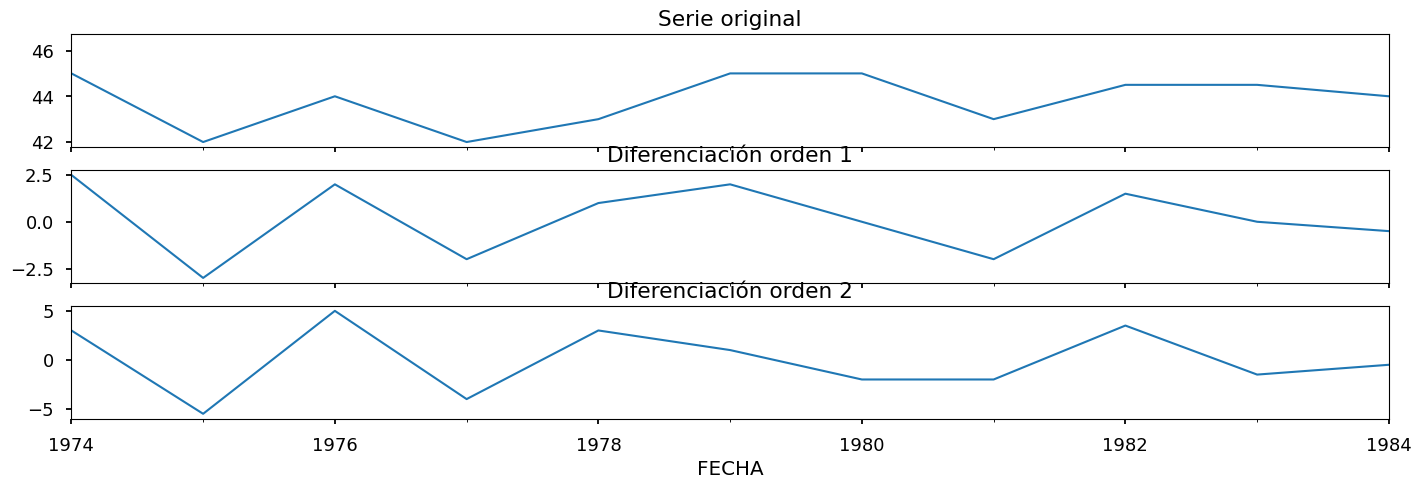

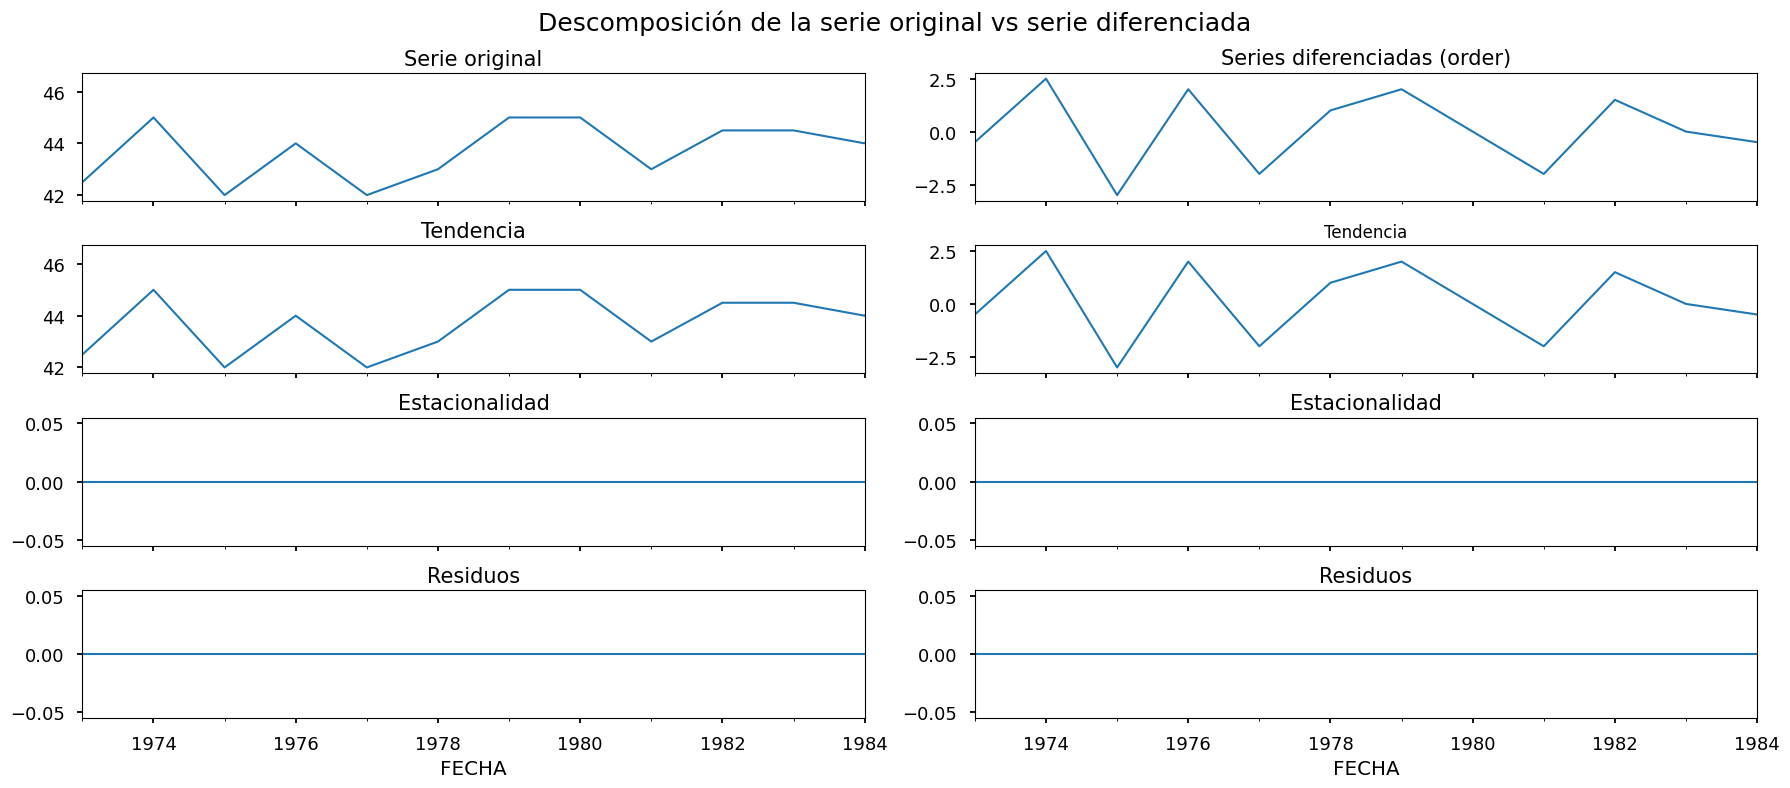

In [29]:
#get the data
data = pd.read_csv("25044_anual.csv",
                   index_col="FECHA",
                   parse_dates=True)
dataset = data.loc[:, ["Year","EVAP","PRECIP","TMAX","TMIN"]]

#data = dataset[dataset.Year.isin( [1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984])]
#data = dataset[dataset.Year.isin( [1972,1973,1974])]
data = dataset[dataset.Year.isin( [1972,1973,1974,1975,1976,1977,1978,1979,1980,
                                   1981,1982,1983,1984,1985])]
data.index = pd.to_datetime(data.index,
                            format = "%d/%m/%Y") 
#data = data.asfreq("MS")
from sktime.forecasting.model_selection import temporal_train_test_split
y_train,y_test=temporal_train_test_split(data['TMAX'],test_size=1)
#Test estacionariedad
# ==============================================================================
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import kpss
warnings.filterwarnings("ignore")

datos_diff_1 = y_train.diff().dropna()
datos_diff_2 = datos_diff_1.diff().dropna()

print('Test estacionariedad serie original')
print('-------------------------------------')
adfuller_result = adfuller(data['TMAX'])
kpss_result = kpss(data['TMAX'])
print(f'ADF Statistic: {adfuller_result[0]}, p-value: {adfuller_result[1]}')
print(f'KPSS Statistic: {kpss_result[0]}, p-value: {kpss_result[1]}')

print('\nTest estacionariedad para serie diferenciada (order=1)')
print('--------------------------------------------------')
adfuller_result = adfuller(datos_diff_1)
kpss_result = kpss(data['TMAX'].diff().dropna())
print(f'ADF Statistic: {adfuller_result[0]}, p-value: {adfuller_result[1]}')
print(f'KPSS Statistic: {kpss_result[0]}, p-value: {kpss_result[1]}')

print('\nTest estacionariedad para serie diferenciada (order=2)')
print('--------------------------------------------------')
adfuller_result = adfuller(datos_diff_2)
kpss_result = kpss(data['TMAX'].diff().diff().dropna())
print(f'ADF Statistic: {adfuller_result[0]}, p-value: {adfuller_result[1]}')
print(f'KPSS Statistic: {kpss_result[0]}, p-value: {kpss_result[1]}')

warnings.filterwarnings("default")
# Gráfico series
# ==============================================================================
fig, axs = plt.subplots(nrows=3, ncols=1, figsize=(17, 5), sharex=True)
data['TMAX'].plot(ax=axs[0], title='Serie original')
datos_diff_1.plot(ax=axs[1], title='Diferenciación orden 1')
datos_diff_2.plot(ax=axs[2], title='Diferenciación orden 2');

# Descomposición de la serie original y la serie diferenciada
# ==============================================================================
#library

from statsmodels.tsa.seasonal import seasonal_decompose
res_decompose = seasonal_decompose(data['TMAX'], model='additive', extrapolate_trend='freq')
res_descompose_diff_2 = seasonal_decompose(datos_diff_1, model='additive', extrapolate_trend='freq')

fig, axs = plt.subplots(nrows=4, ncols=2, figsize=(18, 8), sharex=True)
res_decompose.observed.plot(ax=axs[0, 0])
axs[0, 0].set_title('Serie original', fontsize=15)
res_decompose.trend.plot(ax=axs[1, 0])
axs[1, 0].set_title('Tendencia', fontsize=15)
res_decompose.seasonal.plot(ax=axs[2, 0])
axs[2, 0].set_title('Estacionalidad', fontsize=15)
res_decompose.resid.plot(ax=axs[3, 0])
axs[3, 0].set_title('Residuos', fontsize=15)
res_descompose_diff_2.observed.plot(ax=axs[0, 1])
axs[0, 1].set_title('Series diferenciadas (order)', fontsize=15)
res_descompose_diff_2.trend.plot(ax=axs[1, 1])
axs[1, 1].set_title('Tendencia', fontsize=12)
res_descompose_diff_2.seasonal.plot(ax=axs[2, 1])
axs[2, 1].set_title('Estacionalidad', fontsize=15)
res_descompose_diff_2.resid.plot(ax=axs[3, 1])
axs[3, 1].set_title('Residuos', fontsize=15)
fig.suptitle('Descomposición de la serie original vs serie diferenciada', fontsize=18)
fig.tight_layout();


c:\Users\ZM\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\model_selection\__init__.py:36: DeprecationWarning: WARNING - the old location of temporal_train_test_split in sktime.forecasting.model_selection is deprecated and is scheduled for imminent removal in a MINOR version. Please update any import statements to from sktime.split import temporal_train_test_split.
  warn(


Test estacionariedad serie original
-------------------------------------
ADF Statistic: -3.4027610304672993, p-value: 0.01086510760723917
KPSS Statistic: 0.033041611895972406, p-value: 0.1

Test estacionariedad para serie diferenciada (order=1)
--------------------------------------------------
ADF Statistic: -10.873837763369288, p-value: 1.3472651487059514e-19
KPSS Statistic: 0.01937429340262293, p-value: 0.1

Test estacionariedad para serie diferenciada (order=2)
--------------------------------------------------
ADF Statistic: -8.89245568952319, p-value: 1.2319891844066021e-14
KPSS Statistic: 0.04647625117504815, p-value: 0.1


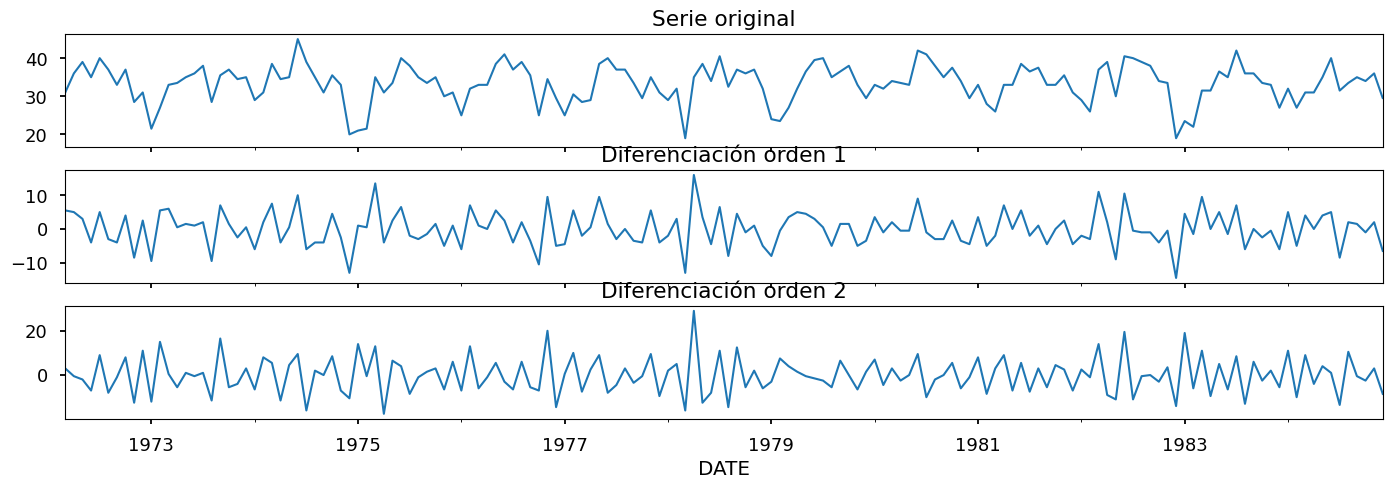

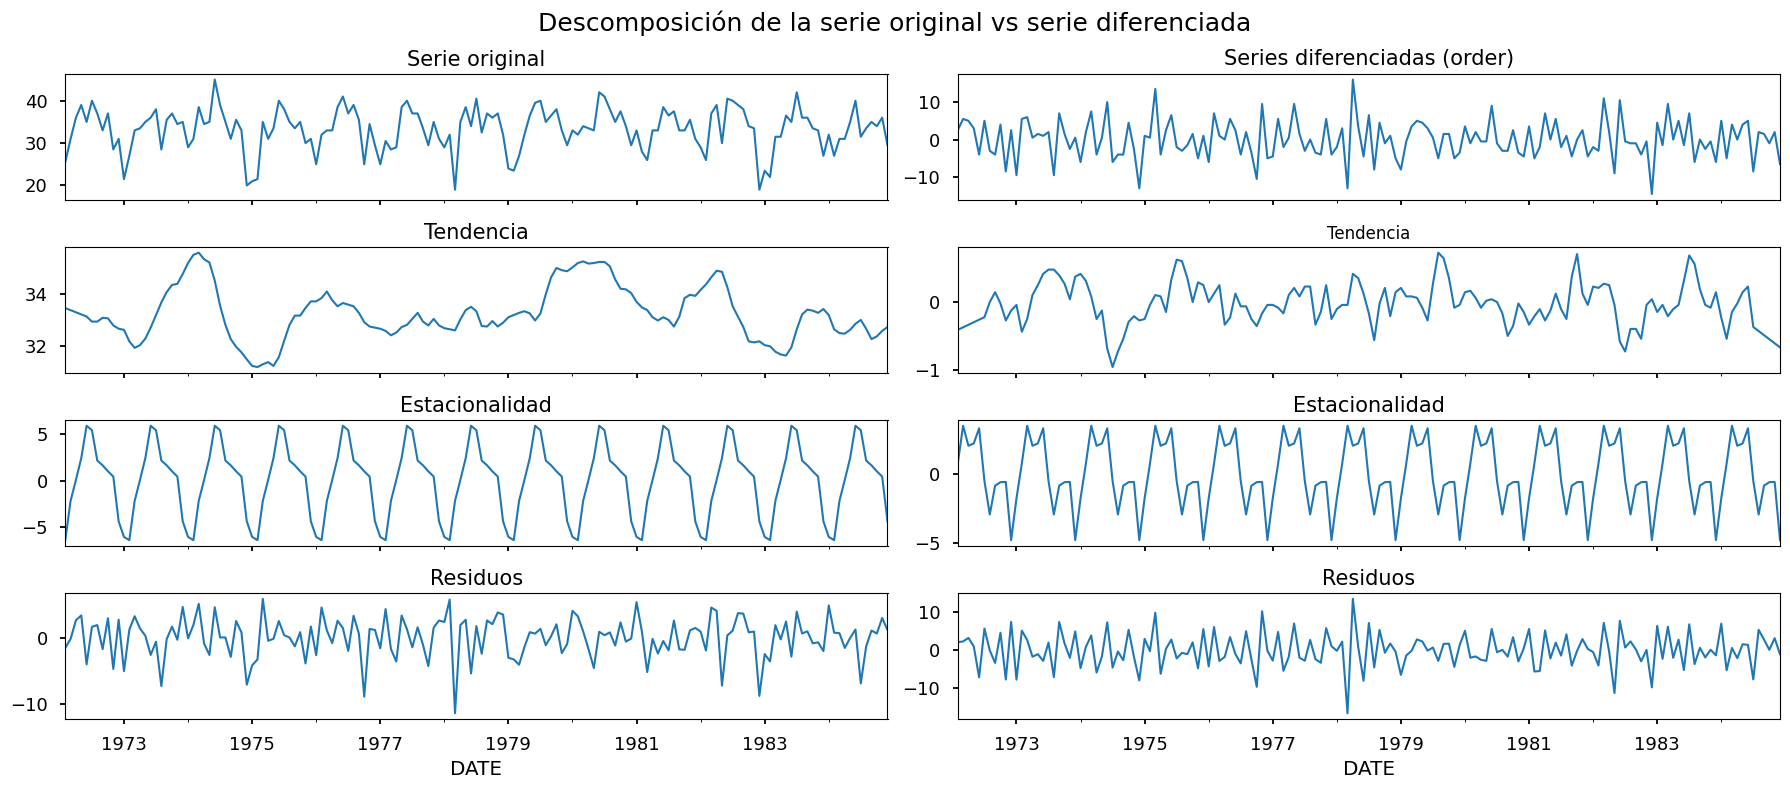

In [18]:
#get the data
data = pd.read_csv("25044_daily.csv",
                   index_col="DATE",
                   parse_dates=True)
dataset = data.loc[:, ["Year","Month","EVAP","PRECIP","TMAX","TMIN"]]

#data = dataset[dataset.Year.isin( [1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984])]
#data = dataset[dataset.Year.isin( [1972,1973,1974])]
data = dataset[dataset.Year.isin( [1972,1973,1974,1975,1976,1977,1978,1979,1980,
                                   1981,1982,1983,1984,1985])]
data.index = pd.to_datetime(data.index,
                            format = "%d/%m/%Y") 
data = data.asfreq("MS")
from sktime.forecasting.model_selection import temporal_train_test_split
y_train,y_test=temporal_train_test_split(data['TMAX'],test_size=9)
#Test estacionariedad
# ==============================================================================
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import kpss
warnings.filterwarnings("ignore")

datos_diff_1 = y_train.diff().dropna()
datos_diff_2 = datos_diff_1.diff().dropna()

print('Test estacionariedad serie original')
print('-------------------------------------')
adfuller_result = adfuller(data['TMAX'])
kpss_result = kpss(data['TMAX'])
print(f'ADF Statistic: {adfuller_result[0]}, p-value: {adfuller_result[1]}')
print(f'KPSS Statistic: {kpss_result[0]}, p-value: {kpss_result[1]}')

print('\nTest estacionariedad para serie diferenciada (order=1)')
print('--------------------------------------------------')
adfuller_result = adfuller(datos_diff_1)
kpss_result = kpss(data['TMAX'].diff().dropna())
print(f'ADF Statistic: {adfuller_result[0]}, p-value: {adfuller_result[1]}')
print(f'KPSS Statistic: {kpss_result[0]}, p-value: {kpss_result[1]}')

print('\nTest estacionariedad para serie diferenciada (order=2)')
print('--------------------------------------------------')
adfuller_result = adfuller(datos_diff_2)
kpss_result = kpss(data['TMAX'].diff().diff().dropna())
print(f'ADF Statistic: {adfuller_result[0]}, p-value: {adfuller_result[1]}')
print(f'KPSS Statistic: {kpss_result[0]}, p-value: {kpss_result[1]}')

warnings.filterwarnings("default")
# Gráfico series
# ==============================================================================
fig, axs = plt.subplots(nrows=3, ncols=1, figsize=(17, 5), sharex=True)
data['TMAX'].plot(ax=axs[0], title='Serie original')
datos_diff_1.plot(ax=axs[1], title='Diferenciación orden 1')
datos_diff_2.plot(ax=axs[2], title='Diferenciación orden 2');

# Descomposición de la serie original y la serie diferenciada
# ==============================================================================
#library

from statsmodels.tsa.seasonal import seasonal_decompose
res_decompose = seasonal_decompose(data['TMAX'], model='additive', extrapolate_trend='freq')
res_descompose_diff_2 = seasonal_decompose(datos_diff_1, model='additive', extrapolate_trend='freq')

fig, axs = plt.subplots(nrows=4, ncols=2, figsize=(18, 8), sharex=True)
res_decompose.observed.plot(ax=axs[0, 0])
axs[0, 0].set_title('Serie original', fontsize=15)
res_decompose.trend.plot(ax=axs[1, 0])
axs[1, 0].set_title('Tendencia', fontsize=15)
res_decompose.seasonal.plot(ax=axs[2, 0])
axs[2, 0].set_title('Estacionalidad', fontsize=15)
res_decompose.resid.plot(ax=axs[3, 0])
axs[3, 0].set_title('Residuos', fontsize=15)
res_descompose_diff_2.observed.plot(ax=axs[0, 1])
axs[0, 1].set_title('Series diferenciadas (order)', fontsize=15)
res_descompose_diff_2.trend.plot(ax=axs[1, 1])
axs[1, 1].set_title('Tendencia', fontsize=12)
res_descompose_diff_2.seasonal.plot(ax=axs[2, 1])
axs[2, 1].set_title('Estacionalidad', fontsize=15)
res_descompose_diff_2.resid.plot(ax=axs[3, 1])
axs[3, 1].set_title('Residuos', fontsize=15)
fig.suptitle('Descomposición de la serie original vs serie diferenciada', fontsize=18)
fig.tight_layout();


c:\Users\ZM\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\model_selection\__init__.py:36: DeprecationWarning: WARNING - the old location of temporal_train_test_split in sktime.forecasting.model_selection is deprecated and is scheduled for imminent removal in a MINOR version. Please update any import statements to from sktime.split import temporal_train_test_split.
  warn(


Test estacionariedad serie original
-------------------------------------
ADF Statistic: -2.513434294451459, p-value: 0.1122397391217777
KPSS Statistic: 0.027826876094643776, p-value: 0.1

Test estacionariedad para serie diferenciada (order=1)
--------------------------------------------------
ADF Statistic: -9.926394739824646, p-value: 2.899336001625387e-17
KPSS Statistic: 0.01101298856773215, p-value: 0.1

Test estacionariedad para serie diferenciada (order=2)
--------------------------------------------------
ADF Statistic: -9.679751716320327, p-value: 1.213538380992496e-16
KPSS Statistic: 0.089304998750759, p-value: 0.1


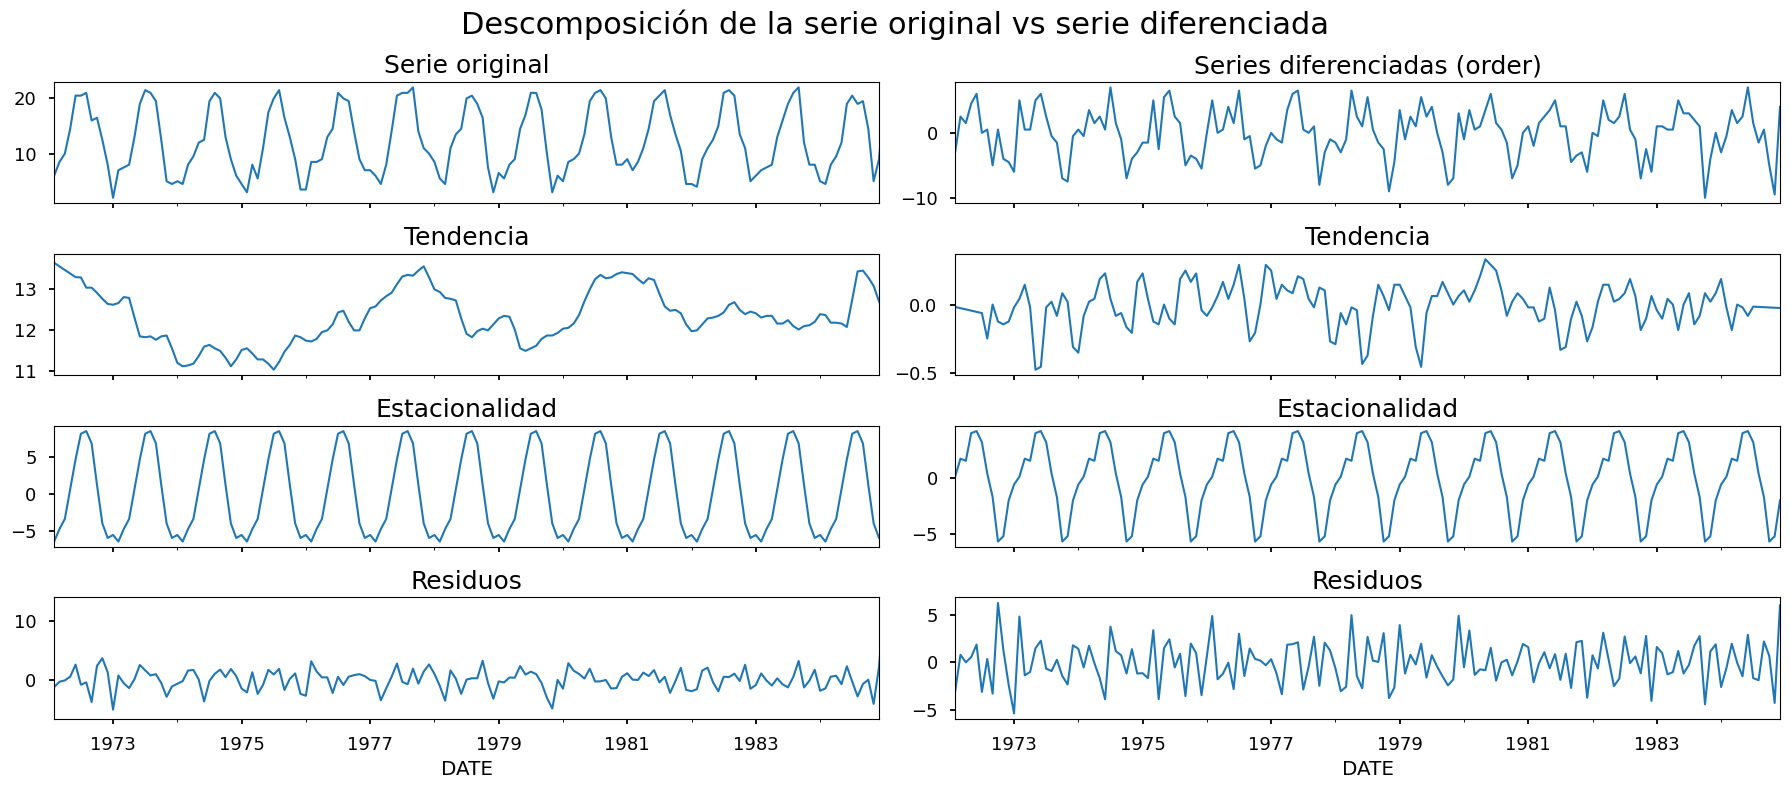

In [15]:
#get the data
data = pd.read_csv("25044_mens.csv",
                   index_col="DATE",
                   parse_dates=True)
dataset = data.loc[:, ["Year","Month","EVAP","PRECIP","TMAX","TMIN"]]

#data = dataset[dataset.Year.isin( [1972,1973,1974,1975,1976,1977,1978,1979])]
#data = dataset[dataset.Year.isin( [1972,1973,1974])]
data = dataset[dataset.Year.isin( [1972,1973,1974,1975,1976,1977,1978,1979,1980,
                                   1981,1982,1983,1984,1985])]
data.index = pd.to_datetime(data.index,
                            format = "%d/%m/%Y") 
data = data.asfreq("MS")
from sktime.forecasting.model_selection import temporal_train_test_split
y_train,y_test=temporal_train_test_split(data['TMIN'],test_size=9)
#Test estacionariedad
# ==============================================================================
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import kpss
warnings.filterwarnings("ignore")

datos_diff_1 = y_train.diff().dropna()
datos_diff_2 = datos_diff_1.diff().dropna()

print('Test estacionariedad serie original')
print('-------------------------------------')
adfuller_result = adfuller(data['TMIN'])
kpss_result = kpss(data['TMIN'])
print(f'ADF Statistic: {adfuller_result[0]}, p-value: {adfuller_result[1]}')
print(f'KPSS Statistic: {kpss_result[0]}, p-value: {kpss_result[1]}')

print('\nTest estacionariedad para serie diferenciada (order=1)')
print('--------------------------------------------------')
adfuller_result = adfuller(datos_diff_1)
kpss_result = kpss(data['TMIN'].diff().dropna())
print(f'ADF Statistic: {adfuller_result[0]}, p-value: {adfuller_result[1]}')
print(f'KPSS Statistic: {kpss_result[0]}, p-value: {kpss_result[1]}')

print('\nTest estacionariedad para serie diferenciada (order=2)')
print('--------------------------------------------------')
adfuller_result = adfuller(datos_diff_2)
kpss_result = kpss(data['TMIN'].diff().diff().dropna())
print(f'ADF Statistic: {adfuller_result[0]}, p-value: {adfuller_result[1]}')
print(f'KPSS Statistic: {kpss_result[0]}, p-value: {kpss_result[1]}')

warnings.filterwarnings("default")
# Gráfico series
# ==============================================================================


#plt.figure(figsize=(14,8))
#fig, axs = plt.subplots(nrows=3, ncols=1, figsize=(17, 5), sharex=True)
#data['TMIN'].plot(ax=axs[0], title='Serie original')
#datos_diff_1.plot(ax=axs[1], title='Diferenciación orden 1')
#datos_diff_2.plot(ax=axs[2], title='Diferenciación orden 2');

# Descomposición de la serie original y la serie diferenciada
# ==============================================================================
#library

from statsmodels.tsa.seasonal import seasonal_decompose
res_decompose_tmin = seasonal_decompose(data['TMIN'], model='additive', extrapolate_trend='freq')
res_descompose_diff_2 = seasonal_decompose(datos_diff_1, model='additive', extrapolate_trend='freq')

fig, axs = plt.subplots(nrows=4, ncols=2, figsize=(18, 8), sharex=True)
ax = plt.gca() # Obtener una referencia al eje

res_decompose_tmin.observed.plot(ax=axs[0, 0])
axs[0, 0].set_title('Serie original', fontsize=18)
res_decompose_tmin.trend.plot(ax=axs[1, 0])
axs[1, 0].set_title('Tendencia', fontsize=18)
res_decompose_tmin.seasonal.plot(ax=axs[2, 0])
axs[2, 0].set_title('Estacionalidad', fontsize=18)
res_decompose_tmin.resid.plot(ax=axs[3, 0])
axs[3, 0].set_title('Residuos', fontsize=18)
res_descompose_diff_2.observed.plot(ax=axs[0, 1])
axs[0, 1].set_title('Series diferenciadas (order)', fontsize=18)
res_descompose_diff_2.trend.plot(ax=axs[1, 1])
axs[1, 1].set_title('Tendencia', fontsize=18)
res_descompose_diff_2.seasonal.plot(ax=axs[2, 1])
axs[2, 1].set_title('Estacionalidad', fontsize=18)
res_descompose_diff_2.resid.plot(ax=axs[3, 1])
axs[3, 1].set_title('Residuos', fontsize=18)
axs[3, 1].xaxis.offsetText.set_fontsize(22)
fig.suptitle('Descomposición de la serie original vs serie diferenciada', fontsize=22)
fig.tight_layout();


c:\Users\ZM\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\model_selection\__init__.py:36: DeprecationWarning: WARNING - the old location of temporal_train_test_split in sktime.forecasting.model_selection is deprecated and is scheduled for imminent removal in a MINOR version. Please update any import statements to from sktime.split import temporal_train_test_split.
  warn(


Test estacionariedad serie original
-------------------------------------
ADF Statistic: -1.3678247702765516, p-value: 0.5976004747829413
KPSS Statistic: 0.04890265924026237, p-value: 0.1

Test estacionariedad para serie diferenciada (order=1)
--------------------------------------------------
ADF Statistic: -8.176433730633908, p-value: 8.352857906914604e-13
KPSS Statistic: 0.010148124833634494, p-value: 0.1

Test estacionariedad para serie diferenciada (order=2)
--------------------------------------------------
ADF Statistic: -12.345732893836974, p-value: 5.978448952588883e-23
KPSS Statistic: 0.09831462094208089, p-value: 0.1


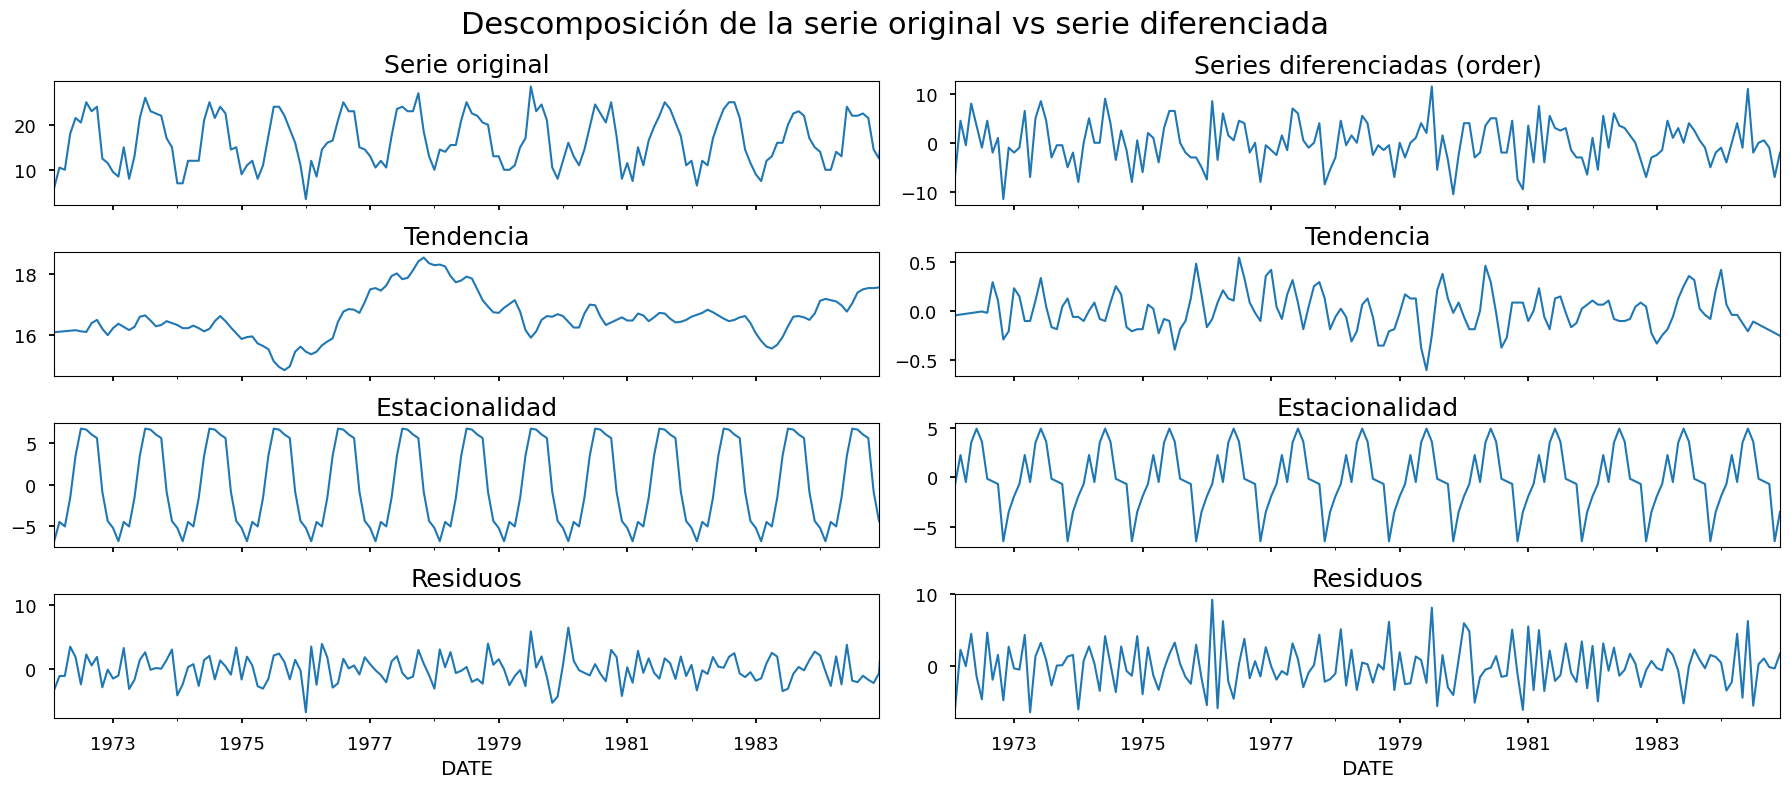

In [19]:
#get the data
data = pd.read_csv("25044_daily.csv",
                   index_col="DATE",
                   parse_dates=True)
dataset = data.loc[:, ["Year","Month","EVAP","PRECIP","TMAX","TMIN"]]

#data = dataset[dataset.Year.isin( [1972,1973,1974,1975,1976,1977,1978,1979])]
#data = dataset[dataset.Year.isin( [1972,1973,1974])]
data = dataset[dataset.Year.isin( [1972,1973,1974,1975,1976,1977,1978,1979,1980,
                                   1981,1982,1983,1984,1985])]
data.index = pd.to_datetime(data.index,
                            format = "%d/%m/%Y") 
data = data.asfreq("MS")
from sktime.forecasting.model_selection import temporal_train_test_split
y_train,y_test=temporal_train_test_split(data['TMIN'],test_size=9)
#Test estacionariedad
# ==============================================================================
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import kpss
warnings.filterwarnings("ignore")

datos_diff_1 = y_train.diff().dropna()
datos_diff_2 = datos_diff_1.diff().dropna()

print('Test estacionariedad serie original')
print('-------------------------------------')
adfuller_result = adfuller(data['TMIN'])
kpss_result = kpss(data['TMIN'])
print(f'ADF Statistic: {adfuller_result[0]}, p-value: {adfuller_result[1]}')
print(f'KPSS Statistic: {kpss_result[0]}, p-value: {kpss_result[1]}')

print('\nTest estacionariedad para serie diferenciada (order=1)')
print('--------------------------------------------------')
adfuller_result = adfuller(datos_diff_1)
kpss_result = kpss(data['TMIN'].diff().dropna())
print(f'ADF Statistic: {adfuller_result[0]}, p-value: {adfuller_result[1]}')
print(f'KPSS Statistic: {kpss_result[0]}, p-value: {kpss_result[1]}')

print('\nTest estacionariedad para serie diferenciada (order=2)')
print('--------------------------------------------------')
adfuller_result = adfuller(datos_diff_2)
kpss_result = kpss(data['TMIN'].diff().diff().dropna())
print(f'ADF Statistic: {adfuller_result[0]}, p-value: {adfuller_result[1]}')
print(f'KPSS Statistic: {kpss_result[0]}, p-value: {kpss_result[1]}')

warnings.filterwarnings("default")
# Gráfico series
# ==============================================================================


#plt.figure(figsize=(14,8))
#fig, axs = plt.subplots(nrows=3, ncols=1, figsize=(17, 5), sharex=True)
#data['TMIN'].plot(ax=axs[0], title='Serie original')
#datos_diff_1.plot(ax=axs[1], title='Diferenciación orden 1')
#datos_diff_2.plot(ax=axs[2], title='Diferenciación orden 2');

# Descomposición de la serie original y la serie diferenciada
# ==============================================================================
#library

from statsmodels.tsa.seasonal import seasonal_decompose
res_decompose_tmin = seasonal_decompose(data['TMIN'], model='additive', extrapolate_trend='freq')
res_descompose_diff_2 = seasonal_decompose(datos_diff_1, model='additive', extrapolate_trend='freq')

fig, axs = plt.subplots(nrows=4, ncols=2, figsize=(18, 8), sharex=True)
ax = plt.gca() # Obtener una referencia al eje

res_decompose_tmin.observed.plot(ax=axs[0, 0])
axs[0, 0].set_title('Serie original', fontsize=18)
res_decompose_tmin.trend.plot(ax=axs[1, 0])
axs[1, 0].set_title('Tendencia', fontsize=18)
res_decompose_tmin.seasonal.plot(ax=axs[2, 0])
axs[2, 0].set_title('Estacionalidad', fontsize=18)
res_decompose_tmin.resid.plot(ax=axs[3, 0])
axs[3, 0].set_title('Residuos', fontsize=18)
res_descompose_diff_2.observed.plot(ax=axs[0, 1])
axs[0, 1].set_title('Series diferenciadas (order)', fontsize=18)
res_descompose_diff_2.trend.plot(ax=axs[1, 1])
axs[1, 1].set_title('Tendencia', fontsize=18)
res_descompose_diff_2.seasonal.plot(ax=axs[2, 1])
axs[2, 1].set_title('Estacionalidad', fontsize=18)
res_descompose_diff_2.resid.plot(ax=axs[3, 1])
axs[3, 1].set_title('Residuos', fontsize=18)
axs[3, 1].xaxis.offsetText.set_fontsize(22)
fig.suptitle('Descomposición de la serie original vs serie diferenciada', fontsize=22)
fig.tight_layout();


c:\Users\ZM\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\model_selection\__init__.py:36: DeprecationWarning: WARNING - the old location of temporal_train_test_split in sktime.forecasting.model_selection is deprecated and is scheduled for imminent removal in a MINOR version. Please update any import statements to from sktime.split import temporal_train_test_split.
  warn(


Test estacionariedad serie original
-------------------------------------
ADF Statistic: 0.9305366293100671, p-value: 0.9934761736552281
KPSS Statistic: 0.4632749326145494, p-value: 0.04993807823996636

Test estacionariedad para serie diferenciada (order=1)
--------------------------------------------------
ADF Statistic: -76.99855594586384, p-value: 0.0
KPSS Statistic: 0.35784857101547035, p-value: 0.09532389180367656

Test estacionariedad para serie diferenciada (order=2)
--------------------------------------------------
ADF Statistic: -2.7978791100112703, p-value: 0.05857736133626775
KPSS Statistic: 0.263948884089273, p-value: 0.1


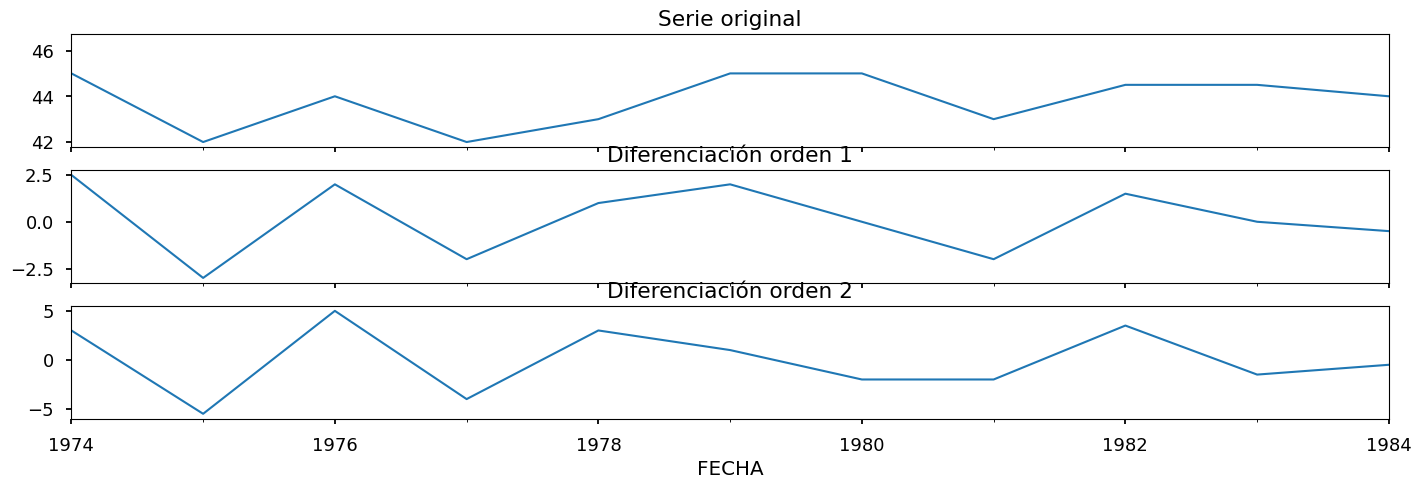

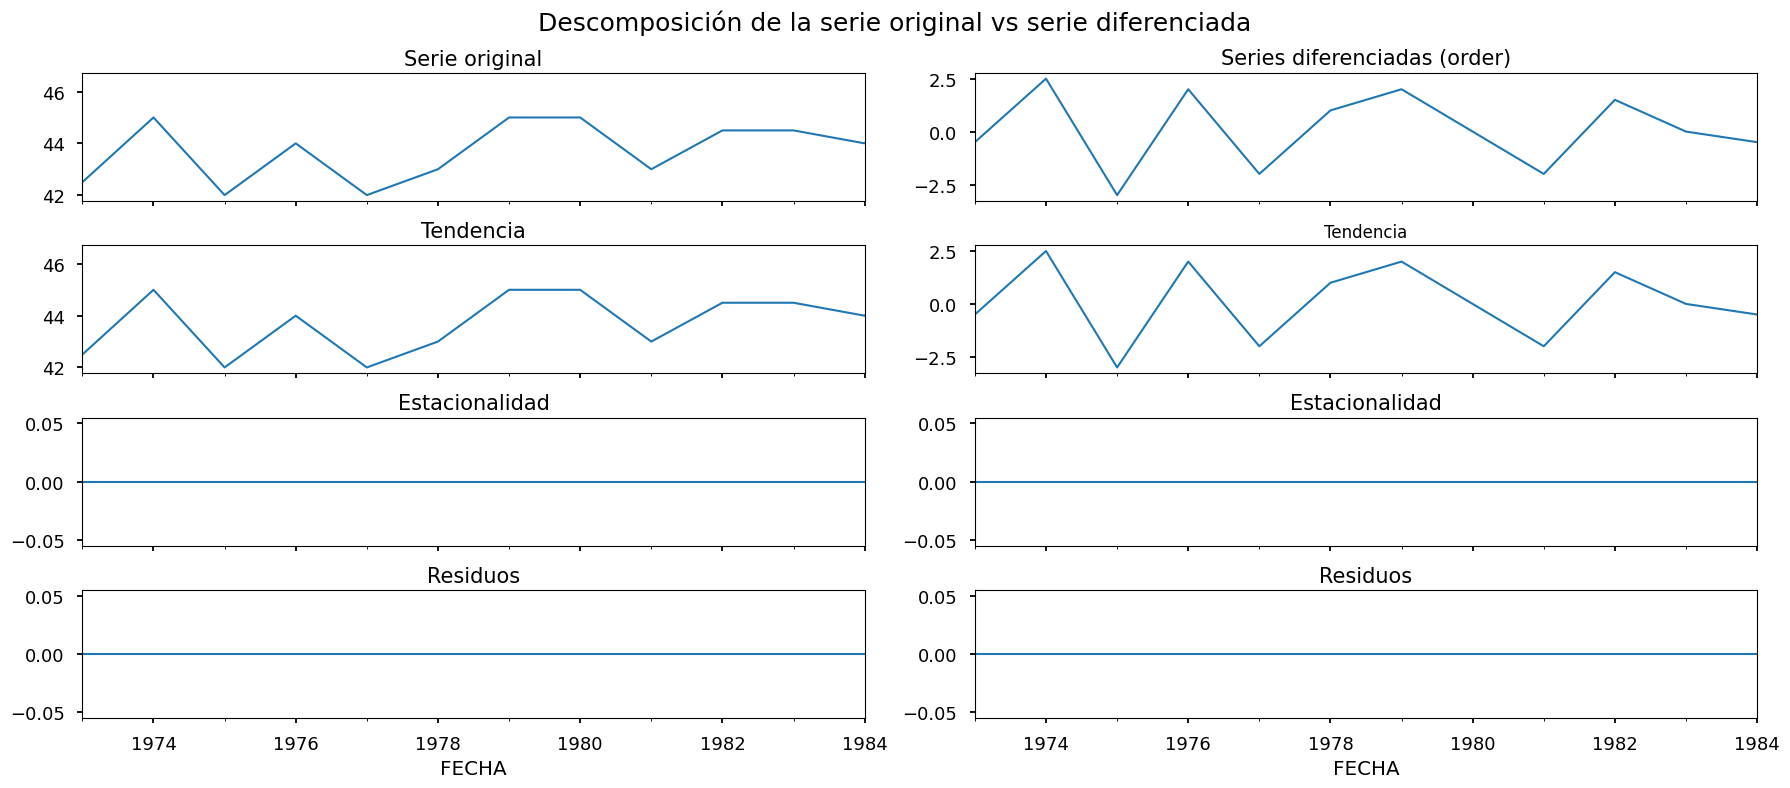

In [31]:
#get the data
data = pd.read_csv("25044_anual.csv",
                   index_col="FECHA",
                   parse_dates=True)
dataset = data.loc[:, ["Year","EVAP","PRECIP","TMAX","TMIN"]]

#data = dataset[dataset.Year.isin( [1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984])]
#data = dataset[dataset.Year.isin( [1972,1973,1974])]
data = dataset[dataset.Year.isin( [1972,1973,1974,1975,1976,1977,1978,1979,1980,
                                   1981,1982,1983,1984,1985])]
data.index = pd.to_datetime(data.index,
                            format = "%d/%m/%Y") 
#data = data.asfreq("MS")
from sktime.forecasting.model_selection import temporal_train_test_split
y_train,y_test=temporal_train_test_split(data['TMAX'],test_size=1)
#Test estacionariedad
# ==============================================================================
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import kpss
warnings.filterwarnings("ignore")

datos_diff_1 = y_train.diff().dropna()
datos_diff_2 = datos_diff_1.diff().dropna()

print('Test estacionariedad serie original')
print('-------------------------------------')
adfuller_result = adfuller(data['TMAX'])
kpss_result = kpss(data['TMAX'])
print(f'ADF Statistic: {adfuller_result[0]}, p-value: {adfuller_result[1]}')
print(f'KPSS Statistic: {kpss_result[0]}, p-value: {kpss_result[1]}')

print('\nTest estacionariedad para serie diferenciada (order=1)')
print('--------------------------------------------------')
adfuller_result = adfuller(datos_diff_1)
kpss_result = kpss(data['TMAX'].diff().dropna())
print(f'ADF Statistic: {adfuller_result[0]}, p-value: {adfuller_result[1]}')
print(f'KPSS Statistic: {kpss_result[0]}, p-value: {kpss_result[1]}')

print('\nTest estacionariedad para serie diferenciada (order=2)')
print('--------------------------------------------------')
adfuller_result = adfuller(datos_diff_2)
kpss_result = kpss(data['TMAX'].diff().diff().dropna())
print(f'ADF Statistic: {adfuller_result[0]}, p-value: {adfuller_result[1]}')
print(f'KPSS Statistic: {kpss_result[0]}, p-value: {kpss_result[1]}')

warnings.filterwarnings("default")
# Gráfico series
# ==============================================================================
fig, axs = plt.subplots(nrows=3, ncols=1, figsize=(17, 5), sharex=True)
data['TMAX'].plot(ax=axs[0], title='Serie original')
datos_diff_1.plot(ax=axs[1], title='Diferenciación orden 1')
datos_diff_2.plot(ax=axs[2], title='Diferenciación orden 2');

# Descomposición de la serie original y la serie diferenciada
# ==============================================================================
#library

from statsmodels.tsa.seasonal import seasonal_decompose
res_decompose = seasonal_decompose(data['TMAX'], model='additive', extrapolate_trend='freq')
res_descompose_diff_2 = seasonal_decompose(datos_diff_1, model='additive', extrapolate_trend='freq')

fig, axs = plt.subplots(nrows=4, ncols=2, figsize=(18, 8), sharex=True)
res_decompose.observed.plot(ax=axs[0, 0])
axs[0, 0].set_title('Serie original', fontsize=15)
res_decompose.trend.plot(ax=axs[1, 0])
axs[1, 0].set_title('Tendencia', fontsize=15)
res_decompose.seasonal.plot(ax=axs[2, 0])
axs[2, 0].set_title('Estacionalidad', fontsize=15)
res_decompose.resid.plot(ax=axs[3, 0])
axs[3, 0].set_title('Residuos', fontsize=15)
res_descompose_diff_2.observed.plot(ax=axs[0, 1])
axs[0, 1].set_title('Series diferenciadas (order)', fontsize=15)
res_descompose_diff_2.trend.plot(ax=axs[1, 1])
axs[1, 1].set_title('Tendencia', fontsize=12)
res_descompose_diff_2.seasonal.plot(ax=axs[2, 1])
axs[2, 1].set_title('Estacionalidad', fontsize=15)
res_descompose_diff_2.resid.plot(ax=axs[3, 1])
axs[3, 1].set_title('Residuos', fontsize=15)
fig.suptitle('Descomposición de la serie original vs serie diferenciada', fontsize=18)
fig.tight_layout();


In [37]:
import statsmodels.api as sm
import pymannkendall as mk
dataset = pd.read_csv("25044_anual.csv",
                   index_col="FECHA",
                   parse_dates=True)
data = dataset[dataset.Year.isin( [1972,1973,1974,1975,1976,1977,1978,1979,1980,
                                   1981,1982,1983,1984,1985])]

data.index = pd.to_datetime(data.index,
                            format = "%d/%m/%Y") 
print (mk.hamed_rao_modification_test(data['PRECIP']))
print(mk.yue_wang_modification_test(data['PRECIP']))
print(mk.trend_free_pre_whitening_modification_test(data['PRECIP']))
print(mk.pre_whitening_modification_test(data['PRECIP']))
print(mk.original_test(data['PRECIP'], alpha=0.05))

Modified_Mann_Kendall_Test_Hamed_Rao_Approach(trend='no trend', h=False, p=0.4434214028640828, z=0.7664284620319025, Tau=0.16483516483516483, s=15.0, var_s=333.6666666666667, slope=22.150000000000034, intercept=777.5749999999997)
Modified_Mann_Kendall_Test_Yue_Wang_Approach(trend='no trend', h=False, p=0.11460716550115779, z=1.577819139631074, Tau=0.16483516483516483, s=15.0, var_s=78.73025017765711, slope=22.150000000000034, intercept=777.5749999999997)
Modified_Mann_Kendall_Test_Trend_Free_PreWhitening_Approach(trend='no trend', h=False, p=0.12720368763109935, z=1.5252221902164076, Tau=0.3333333333333333, s=26.0, var_s=268.6666666666667, slope=22.150000000000034, intercept=777.5749999999997)
Modified_Mann_Kendall_Test_PreWhitening_Approach(trend='no trend', h=False, p=0.05858757531048897, z=1.8912755158683454, Tau=0.41025641025641024, s=32.0, var_s=268.6666666666667, slope=22.150000000000034, intercept=777.5749999999997)
Mann_Kendall_Test(trend='no trend', h=False, p=0.44342140286408

In [36]:
import statsmodels.api as sm
import pymannkendall as mk
dataset = pd.read_csv("25044_anual.csv",
                   index_col="FECHA",
                   parse_dates=True)
data = dataset[dataset.Year.isin( [1972,1973,1974,1975,1976,1977,1978,1979,1980,
                                   1981,1982,1983,1984,1985])]

data.index = pd.to_datetime(data.index,
                            format = "%d/%m/%Y") 
print (mk.hamed_rao_modification_test(data['EVAP']))
print(mk.yue_wang_modification_test(data['EVAP']))
print(mk.trend_free_pre_whitening_modification_test(data['EVAP']))
print(mk.pre_whitening_modification_test(data['EVAP']))
print(mk.original_test(data['EVAP'], alpha=0.05))

Modified_Mann_Kendall_Test_Hamed_Rao_Approach(trend='no trend', h=False, p=0.07980192864239077, z=-1.7518364846443486, Tau=-0.3626373626373626, s=-33.0, var_s=333.6666666666667, slope=-0.07786835341966736, intercept=7.101760735584001)
Modified_Mann_Kendall_Test_Yue_Wang_Approach(trend='decreasing', h=True, p=0.0007228856809973205, z=-3.3807489093576395, Tau=-0.3626373626373626, s=-33.0, var_s=89.59300915060543, slope=-0.07786835341966736, intercept=7.101760735584001)
Modified_Mann_Kendall_Test_Trend_Free_PreWhitening_Approach(trend='decreasing', h=True, p=0.03273560958832067, z=-2.135311066302971, Tau=-0.46153846153846156, s=-36.0, var_s=268.6666666666667, slope=-0.07786835341966736, intercept=7.101760735584001)
Modified_Mann_Kendall_Test_PreWhitening_Approach(trend='no trend', h=False, p=0.05858757531048897, z=-1.8912755158683454, Tau=-0.41025641025641024, s=-32.0, var_s=268.6666666666667, slope=-0.07786835341966736, intercept=7.101760735584001)
Mann_Kendall_Test(trend='no trend', h=F

In [35]:
import statsmodels.api as sm
import pymannkendall as mk
dataset = pd.read_csv("25044_anual.csv",
                   index_col="FECHA",
                   parse_dates=True)
data = dataset[dataset.Year.isin( [1972,1973,1974,1975,1976,1977,1978,1979,1980,
                                   1981,1982,1983,1984,1985])]

data.index = pd.to_datetime(data.index,
                            format = "%d/%m/%Y") 
print (mk.hamed_rao_modification_test(data['TMAX']))
print(mk.yue_wang_modification_test(data['TMAX']))
print(mk.trend_free_pre_whitening_modification_test(data['TMAX']))
print(mk.pre_whitening_modification_test(data['TMAX']))
print(mk.original_test(data['TMAX'], alpha=0.05))

Modified_Mann_Kendall_Test_Hamed_Rao_Approach(trend='no trend', h=False, p=0.10679422634507829, z=1.6127711951281407, Tau=0.32967032967032966, s=30.0, var_s=323.3333333333333, slope=0.16666666666666666, intercept=42.916666666666664)
Modified_Mann_Kendall_Test_Yue_Wang_Approach(trend='increasing', h=True, p=3.499156626673994e-07, z=5.094363051450228, Tau=0.32967032967032966, s=30.0, var_s=32.40531236124478, slope=0.16666666666666666, intercept=42.916666666666664)
Modified_Mann_Kendall_Test_Trend_Free_PreWhitening_Approach(trend='no trend', h=False, p=0.12720368763109935, z=1.5252221902164076, Tau=0.3333333333333333, s=26.0, var_s=268.6666666666667, slope=0.16666666666666666, intercept=42.916666666666664)
Modified_Mann_Kendall_Test_PreWhitening_Approach(trend='no trend', h=False, p=0.07685087226788867, z=1.7692577406510328, Tau=0.38461538461538464, s=30.0, var_s=268.6666666666667, slope=0.16666666666666666, intercept=42.916666666666664)
Mann_Kendall_Test(trend='no trend', h=False, p=0.10

In [34]:
import statsmodels.api as sm
import pymannkendall as mk
dataset = pd.read_csv("25044_anual.csv",
                   index_col="FECHA",
                   parse_dates=True)
data = dataset[dataset.Year.isin( [1972,1973,1974,1975,1976,1977,1978,1979,1980,
                                   1981,1982,1983,1984,1985])]

data.index = pd.to_datetime(data.index,
                            format = "%d/%m/%Y") 
print (mk.hamed_rao_modification_test(data['TMIN']))
print(mk.yue_wang_modification_test(data['TMIN']))
print(mk.trend_free_pre_whitening_modification_test(data['TMIN']))
print(mk.pre_whitening_modification_test(data['TMIN']))
print(mk.original_test(data['TMIN'], alpha=0.05))

Modified_Mann_Kendall_Test_Hamed_Rao_Approach(trend='no trend', h=False, p=0.14462777334430976, z=1.4587723568422504, Tau=0.2967032967032967, s=27.0, var_s=317.6666666666667, slope=0.16666666666666666, intercept=3.416666666666667)
Modified_Mann_Kendall_Test_Yue_Wang_Approach(trend='increasing', h=True, p=0.0024375268341809697, z=3.030990789385383, Tau=0.2967032967032967, s=27.0, var_s=73.58299534324772, slope=0.16666666666666666, intercept=3.416666666666667)
Modified_Mann_Kendall_Test_Trend_Free_PreWhitening_Approach(trend='increasing', h=True, p=0.012371581204524418, z=2.5013643919549087, Tau=0.5384615384615384, s=42.0, var_s=268.6666666666667, slope=0.16666666666666666, intercept=3.416666666666667)
Modified_Mann_Kendall_Test_PreWhitening_Approach(trend='increasing', h=True, p=0.010253667300345493, z=2.567155317837794, Tau=0.5512820512820513, s=43.0, var_s=267.6666666666667, slope=0.16666666666666666, intercept=3.416666666666667)
Mann_Kendall_Test(trend='no trend', h=False, p=0.144627

In [39]:
import statsmodels.api as sm
import pymannkendall as mk
dataset = pd.read_csv("25044_daily.csv",
                   index_col="DATE",
                   parse_dates=True)
data = dataset[dataset.Year.isin( [1972,1973,1974,1975,1976,1977,1978,1979,1980,
                                   1981,1982,1983,1984,1985])]

data.index = pd.to_datetime(data.index,
                            format = "%d/%m/%Y") 
print (mk.hamed_rao_modification_test(data['PRECIP']))
print(mk.yue_wang_modification_test(data['PRECIP']))
print(mk.trend_free_pre_whitening_modification_test(data['PRECIP']))
print(mk.pre_whitening_modification_test(data['PRECIP']))
print(mk.original_test(data['PRECIP'], alpha=0.05))

Modified_Mann_Kendall_Test_Hamed_Rao_Approach(trend='no trend', h=False, p=0.28734509001982467, z=1.0639638194910415, Tau=0.01790583888568054, s=225752.0, var_s=45020016084.04779, slope=0.0, intercept=0.0)
Modified_Mann_Kendall_Test_Yue_Wang_Approach(trend='increasing', h=True, p=0.026590652817421345, z=2.2174749525493693, Tau=0.01790583888568054, s=225752.0, var_s=10364346398.501095, slope=0.0, intercept=0.0)
Modified_Mann_Kendall_Test_Trend_Free_PreWhitening_Approach(trend='no trend', h=False, p=0.8593470317799534, z=0.17720542855075197, Tau=0.0012632203708567442, s=15920.0, var_s=8070074080.666667, slope=0.0, intercept=0.0)
Modified_Mann_Kendall_Test_PreWhitening_Approach(trend='no trend', h=False, p=0.8593470317799534, z=0.17720542855075197, Tau=0.0012632203708567442, s=15920.0, var_s=8070074080.666667, slope=0.0, intercept=0.0)
Mann_Kendall_Test(trend='increasing', h=True, p=0.002676444620531848, z=3.0026449729610722, Tau=0.01790583888568054, s=225752.0, var_s=5652640884.666667, s

In [40]:
import statsmodels.api as sm
import pymannkendall as mk
dataset = pd.read_csv("25044_daily.csv",
                   index_col="DATE",
                   parse_dates=True)
data = dataset[dataset.Year.isin( [1972,1973,1974,1975,1976,1977,1978,1979,1980,
                                   1981,1982,1983,1984,1985])]

data.index = pd.to_datetime(data.index,
                            format = "%d/%m/%Y") 
print (mk.hamed_rao_modification_test(data['TMIN']))
print(mk.yue_wang_modification_test(data['TMIN']))
print(mk.trend_free_pre_whitening_modification_test(data['TMIN']))
print(mk.pre_whitening_modification_test(data['TMIN']))
print(mk.original_test(data['TMIN'], alpha=0.05))

Modified_Mann_Kendall_Test_Hamed_Rao_Approach(trend='no trend', h=False, p=0.0842265787332761, z=1.7266720462125285, Tau=0.036072003561138835, s=454605.0, var_s=69318122180.40157, slope=0.00014925373134328358, intercept=16.12537313432836)
Modified_Mann_Kendall_Test_Yue_Wang_Approach(trend='increasing', h=True, p=0.006354919348138921, z=2.7288832752707446, Tau=0.036072003561138835, s=454605.0, var_s=27752146928.695377, slope=0.00014925373134328358, intercept=16.12537313432836)
Modified_Mann_Kendall_Test_Trend_Free_PreWhitening_Approach(trend='increasing', h=True, p=0.0, z=10.660673973064698, Tau=0.10034442822453958, s=1264108.0, var_s=14060421781.333334, slope=0.00014925373134328358, intercept=16.12537313432836)
Modified_Mann_Kendall_Test_PreWhitening_Approach(trend='increasing', h=True, p=0.04764650390276226, z=1.9805077452959938, Tau=0.01864151284878418, s=234840.0, var_s=14060065841.333334, slope=0.00014925373134328358, intercept=16.12537313432836)
Mann_Kendall_Test(trend='increasing

In [41]:
import statsmodels.api as sm
import pymannkendall as mk
dataset = pd.read_csv("25044_daily.csv",
                   index_col="DATE",
                   parse_dates=True)
data = dataset[dataset.Year.isin( [1972,1973,1974,1975,1976,1977,1978,1979,1980,
                                   1981,1982,1983,1984,1985])]

data.index = pd.to_datetime(data.index,
                            format = "%d/%m/%Y") 
print (mk.hamed_rao_modification_test(data['TMAX']))
print(mk.yue_wang_modification_test(data['TMAX']))
print(mk.trend_free_pre_whitening_modification_test(data['TMAX']))
print(mk.pre_whitening_modification_test(data['TMAX']))
print(mk.original_test(data['TMAX'], alpha=0.05))

Modified_Mann_Kendall_Test_Hamed_Rao_Approach(trend='no trend', h=False, p=0.32664482711312637, z=0.9808943842143075, Tau=0.020817147827789154, s=262457.0, var_s=71592662668.22816, slope=0.0, intercept=34.0)
Modified_Mann_Kendall_Test_Yue_Wang_Approach(trend='no trend', h=False, p=0.16408655935456506, z=1.3914580919723085, Tau=0.020817147827789154, s=262457.0, var_s=35577280650.08391, slope=0.0, intercept=34.0)
Modified_Mann_Kendall_Test_Trend_Free_PreWhitening_Approach(trend='no trend', h=False, p=0.4380022528411214, z=0.775571128583353, Tau=0.007299382434412916, s=91992.0, var_s=14068487614.0, slope=0.0, intercept=34.0)
Modified_Mann_Kendall_Test_PreWhitening_Approach(trend='no trend', h=False, p=0.4380022528411214, z=0.775571128583353, Tau=0.007299382434412916, s=91992.0, var_s=14068487614.0, slope=0.0, intercept=34.0)
Mann_Kendall_Test(trend='increasing', h=True, p=0.02682160144464385, z=2.214104350407495, Tau=0.020817147827789154, s=262457.0, var_s=14051310822.333334, slope=0.0, i

In [42]:
import statsmodels.api as sm
import pymannkendall as mk
dataset = pd.read_csv("25044_daily.csv",
                   index_col="DATE",
                   parse_dates=True)
data = dataset[dataset.Year.isin( [1972,1973,1974,1975,1976,1977,1978,1979,1980,
                                   1981,1982,1983,1984,1985])]

data.index = pd.to_datetime(data.index,
                            format = "%d/%m/%Y") 
print (mk.hamed_rao_modification_test(data['EVAP']))
print(mk.yue_wang_modification_test(data['EVAP']))
print(mk.trend_free_pre_whitening_modification_test(data['EVAP']))
print(mk.pre_whitening_modification_test(data['EVAP']))
print(mk.original_test(data['EVAP'], alpha=0.05))

Modified_Mann_Kendall_Test_Hamed_Rao_Approach(trend='decreasing', h=True, p=0.0012464157486129501, z=-3.2280399291163517, Tau=-0.07512755467260525, s=-947188.0, var_s=86098118601.16295, slope=-0.00022753128555176306, intercept=6.671217292377701)
Modified_Mann_Kendall_Test_Yue_Wang_Approach(trend='decreasing', h=True, p=7.104631953858132e-07, z=-4.958481453580321, Tau=-0.07512755467260525, s=-947188.0, var_s=36490017467.74999, slope=-0.00022753128555176306, intercept=6.671217292377701)
Modified_Mann_Kendall_Test_Trend_Free_PreWhitening_Approach(trend='decreasing', h=True, p=0.0, z=-11.616413881813795, Tau=-0.10932950135328037, s=-1377848.0, var_s=14068825263.333334, slope=-0.00022753128555176306, intercept=6.671217292377701)
Modified_Mann_Kendall_Test_PreWhitening_Approach(trend='decreasing', h=True, p=4.917203146459492e-05, z=-4.059527905311552, Tau=-0.03820686185748938, s=-481510.0, var_s=14068822678.0, slope=-0.00022753128555176306, intercept=6.671217292377701)
Mann_Kendall_Test(tren

In [44]:
import statsmodels.api as sm
import pymannkendall as mk
dataset = pd.read_csv("25044_anual.csv",
                   index_col="FECHA",
                   parse_dates=True)
data = dataset[dataset.Year.isin( [1972,1973,1974,1975,1976,1977,1978,1979,1980,
                                   1981,1982,1983,1984,1985])]

data.index = pd.to_datetime(data.index,
                            format = "%d/%m/%Y") 
print (mk.hamed_rao_modification_test(data['EVAP']))
print(mk.yue_wang_modification_test(data['EVAP']))
print(mk.trend_free_pre_whitening_modification_test(data['EVAP']))
print(mk.pre_whitening_modification_test(data['EVAP']))
print(mk.original_test(data['EVAP'], alpha=0.05))

Modified_Mann_Kendall_Test_Hamed_Rao_Approach(trend='no trend', h=False, p=0.07980192864239077, z=-1.7518364846443486, Tau=-0.3626373626373626, s=-33.0, var_s=333.6666666666667, slope=-0.07786835341966736, intercept=7.101760735584001)
Modified_Mann_Kendall_Test_Yue_Wang_Approach(trend='decreasing', h=True, p=0.0007228856809973205, z=-3.3807489093576395, Tau=-0.3626373626373626, s=-33.0, var_s=89.59300915060543, slope=-0.07786835341966736, intercept=7.101760735584001)
Modified_Mann_Kendall_Test_Trend_Free_PreWhitening_Approach(trend='decreasing', h=True, p=0.03273560958832067, z=-2.135311066302971, Tau=-0.46153846153846156, s=-36.0, var_s=268.6666666666667, slope=-0.07786835341966736, intercept=7.101760735584001)
Modified_Mann_Kendall_Test_PreWhitening_Approach(trend='no trend', h=False, p=0.05858757531048897, z=-1.8912755158683454, Tau=-0.41025641025641024, s=-32.0, var_s=268.6666666666667, slope=-0.07786835341966736, intercept=7.101760735584001)
Mann_Kendall_Test(trend='no trend', h=F

In [45]:
import statsmodels.api as sm
import pymannkendall as mk
dataset = pd.read_csv("25044_anual.csv",
                   index_col="FECHA",
                   parse_dates=True)
data = dataset[dataset.Year.isin( [1972,1973,1974,1975,1976,1977,1978,1979,1980,
                                   1981,1982,1983,1984,1985])]

data.index = pd.to_datetime(data.index,
                            format = "%d/%m/%Y") 
print (mk.hamed_rao_modification_test(data['PRECIP']))
print(mk.yue_wang_modification_test(data['PRECIP']))
print(mk.trend_free_pre_whitening_modification_test(data['PRECIP']))
print(mk.pre_whitening_modification_test(data['PRECIP']))
print(mk.original_test(data['PRECIP'], alpha=0.05))

Modified_Mann_Kendall_Test_Hamed_Rao_Approach(trend='no trend', h=False, p=0.4434214028640828, z=0.7664284620319025, Tau=0.16483516483516483, s=15.0, var_s=333.6666666666667, slope=22.150000000000034, intercept=777.5749999999997)
Modified_Mann_Kendall_Test_Yue_Wang_Approach(trend='no trend', h=False, p=0.11460716550115779, z=1.577819139631074, Tau=0.16483516483516483, s=15.0, var_s=78.73025017765711, slope=22.150000000000034, intercept=777.5749999999997)
Modified_Mann_Kendall_Test_Trend_Free_PreWhitening_Approach(trend='no trend', h=False, p=0.12720368763109935, z=1.5252221902164076, Tau=0.3333333333333333, s=26.0, var_s=268.6666666666667, slope=22.150000000000034, intercept=777.5749999999997)
Modified_Mann_Kendall_Test_PreWhitening_Approach(trend='no trend', h=False, p=0.05858757531048897, z=1.8912755158683454, Tau=0.41025641025641024, s=32.0, var_s=268.6666666666667, slope=22.150000000000034, intercept=777.5749999999997)
Mann_Kendall_Test(trend='no trend', h=False, p=0.44342140286408

In [46]:
import statsmodels.api as sm
import pymannkendall as mk
dataset = pd.read_csv("25044_anual.csv",
                   index_col="FECHA",
                   parse_dates=True)
data = dataset[dataset.Year.isin( [1972,1973,1974,1975,1976,1977,1978,1979,1980,
                                   1981,1982,1983,1984,1985])]

data.index = pd.to_datetime(data.index,
                            format = "%d/%m/%Y") 
print (mk.hamed_rao_modification_test(data['TMAX']))
print(mk.yue_wang_modification_test(data['TMAX']))
print(mk.trend_free_pre_whitening_modification_test(data['TMAX']))
print(mk.pre_whitening_modification_test(data['TMAX']))
print(mk.original_test(data['TMAX'], alpha=0.05))

Modified_Mann_Kendall_Test_Hamed_Rao_Approach(trend='no trend', h=False, p=0.10679422634507829, z=1.6127711951281407, Tau=0.32967032967032966, s=30.0, var_s=323.3333333333333, slope=0.16666666666666666, intercept=42.916666666666664)
Modified_Mann_Kendall_Test_Yue_Wang_Approach(trend='increasing', h=True, p=3.499156626673994e-07, z=5.094363051450228, Tau=0.32967032967032966, s=30.0, var_s=32.40531236124478, slope=0.16666666666666666, intercept=42.916666666666664)
Modified_Mann_Kendall_Test_Trend_Free_PreWhitening_Approach(trend='no trend', h=False, p=0.12720368763109935, z=1.5252221902164076, Tau=0.3333333333333333, s=26.0, var_s=268.6666666666667, slope=0.16666666666666666, intercept=42.916666666666664)
Modified_Mann_Kendall_Test_PreWhitening_Approach(trend='no trend', h=False, p=0.07685087226788867, z=1.7692577406510328, Tau=0.38461538461538464, s=30.0, var_s=268.6666666666667, slope=0.16666666666666666, intercept=42.916666666666664)
Mann_Kendall_Test(trend='no trend', h=False, p=0.10

In [47]:
import statsmodels.api as sm
import pymannkendall as mk
dataset = pd.read_csv("25044_anual.csv",
                   index_col="FECHA",
                   parse_dates=True)
data = dataset[dataset.Year.isin( [1972,1973,1974,1975,1976,1977,1978,1979,1980,
                                   1981,1982,1983,1984,1985])]

data.index = pd.to_datetime(data.index,
                            format = "%d/%m/%Y") 
print (mk.hamed_rao_modification_test(data['TMIN']))
print(mk.yue_wang_modification_test(data['TMIN']))
print(mk.trend_free_pre_whitening_modification_test(data['TMIN']))
print(mk.pre_whitening_modification_test(data['TMIN']))
print(mk.original_test(data['TMIN'], alpha=0.05))

Modified_Mann_Kendall_Test_Hamed_Rao_Approach(trend='no trend', h=False, p=0.14462777334430976, z=1.4587723568422504, Tau=0.2967032967032967, s=27.0, var_s=317.6666666666667, slope=0.16666666666666666, intercept=3.416666666666667)
Modified_Mann_Kendall_Test_Yue_Wang_Approach(trend='increasing', h=True, p=0.0024375268341809697, z=3.030990789385383, Tau=0.2967032967032967, s=27.0, var_s=73.58299534324772, slope=0.16666666666666666, intercept=3.416666666666667)
Modified_Mann_Kendall_Test_Trend_Free_PreWhitening_Approach(trend='increasing', h=True, p=0.012371581204524418, z=2.5013643919549087, Tau=0.5384615384615384, s=42.0, var_s=268.6666666666667, slope=0.16666666666666666, intercept=3.416666666666667)
Modified_Mann_Kendall_Test_PreWhitening_Approach(trend='increasing', h=True, p=0.010253667300345493, z=2.567155317837794, Tau=0.5512820512820513, s=43.0, var_s=267.6666666666667, slope=0.16666666666666666, intercept=3.416666666666667)
Mann_Kendall_Test(trend='no trend', h=False, p=0.144627

C:\Users\ZM\AppData\Local\Temp\ipykernel_8908\1103191967.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title="Evaporacion anual en el estado de Sinaloa",bbox_to_anchor=(1, 1.2),fontsize='medium')
C:\Users\ZM\AppData\Local\Temp\ipykernel_8908\1103191967.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.boxplot(x="Year", y="EVAP",
C:\Users\ZM\AppData\Local\Temp\ipykernel_8908\1103191967.py:7: UserWarning: 
The palette list has fewer values (2) than needed (8) and will cycle, which may produce an uninterpretable plot.
  ax=sns.boxplot(x="Year", y="EVAP",


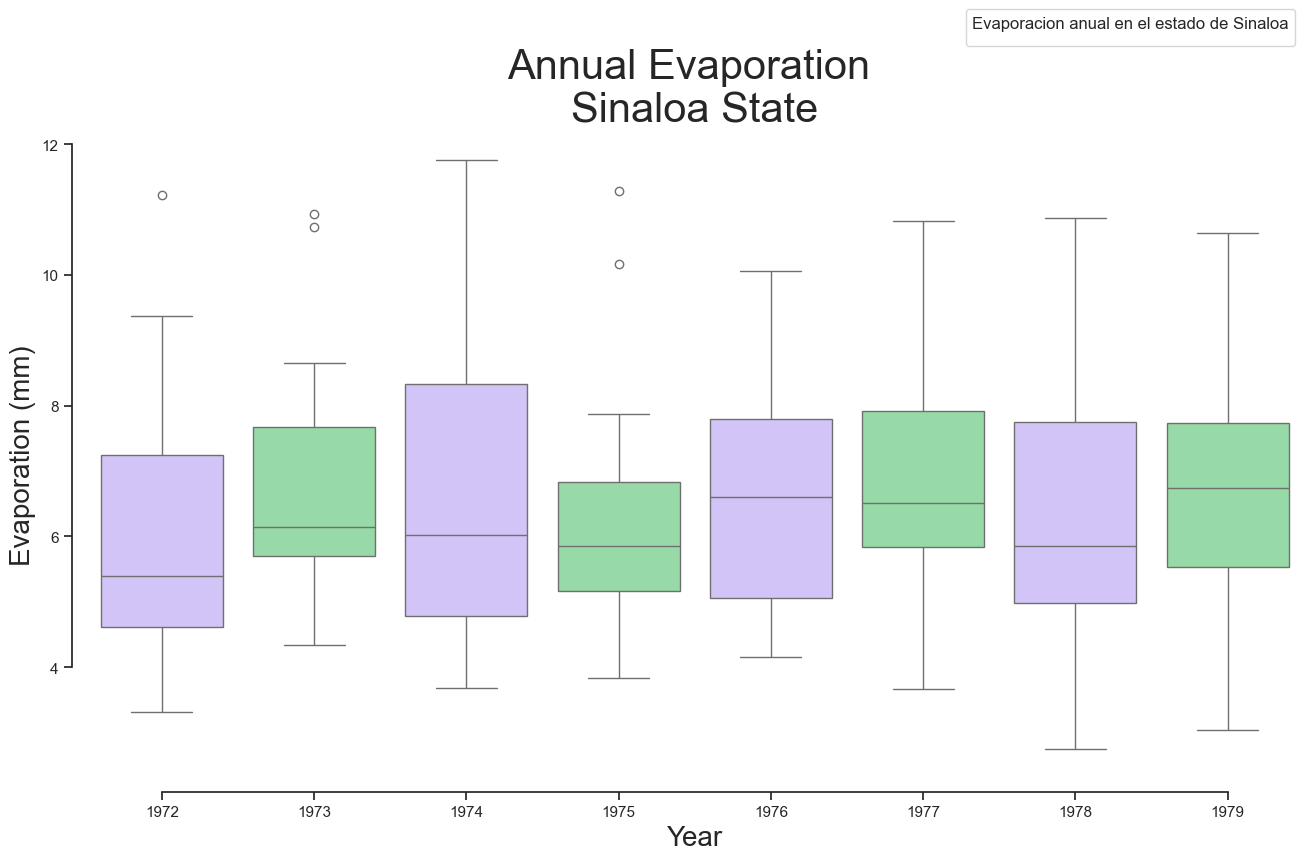

In [70]:
import seaborn as sns
sns.set_theme(style="ticks", palette="pastel")
plt.figure(figsize=(14,8))

# Draw a nested boxplot to show bills by day and time
plt.legend(title="Evaporacion anual en el estado de Sinaloa",bbox_to_anchor=(1, 1.2),fontsize='medium')
ax=sns.boxplot(x="Year", y="EVAP",
            palette=["m", "g"],
            data=data)
ax.set_title('Annual Evaporation \nSinaloa State',fontsize=30)
ax.set_xlabel("Year",fontsize=20)
ax.set_ylabel("Evaporation (mm)",fontsize=20)
#plt.legend(labels=["Legend_Day1", "Legend_Day2"], title="Title_Legend")
sns.despine(offset=10, trim=True)


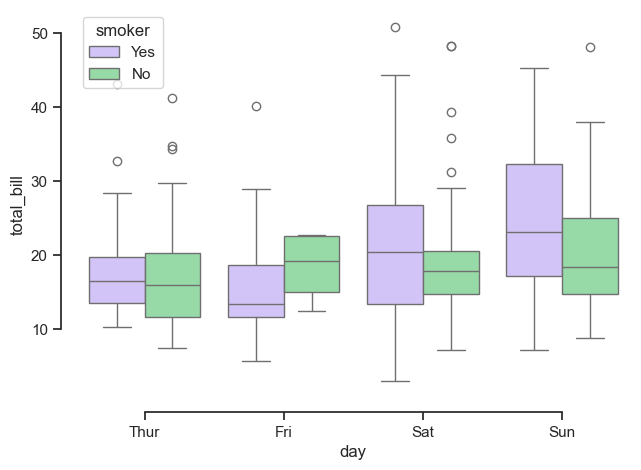

In [22]:
import seaborn as sns
sns.set_theme(style="ticks", palette="pastel")

# Load the example tips dataset
tips = sns.load_dataset("tips")

# Draw a nested boxplot to show bills by day and time
sns.boxplot(x="day", y="total_bill",
            hue="smoker", palette=["m", "g"],
            data=tips)
sns.despine(offset=10, trim=True)

#XGBoost preparation

In [16]:
#isolate X and Y
y_train = training_set.y
y_test = test_set.y
X_train = training_set.iloc[:, 2:]
X_test = test_set.iloc[:, 2:]

In [19]:
#create XGBoost Matrices
Train = xgb.DMatrix(data = X_train, label = y_train)
Test = xgb.DMatrix(data = X_test, label = y_test)

#XGBoost

In [21]:
#Set the parameters
parameters = {'learning_rate': 0.1,
              'max_depth': 3,
              'colsample_bytree': 1,
              'subsample': 1,
              'min_child_weight': 1,
              'gamma': 1,
              'random_state': 1502,
              'eval_metric': "rmse",
              'objective': "reg:squarederror"}

In [22]:
#XGBoost Model
model = xgb.train(params = parameters,
                  dtrain = Train,
                  num_boost_round = 100,
                  evals = [(Test, "y")],
                  verbose_eval = 15)

[0]	y-rmse:3891.59
[15]	y-rmse:1607.49
[30]	y-rmse:1368.37
[45]	y-rmse:1290.71
[60]	y-rmse:1252.2
[75]	y-rmse:1212.15
[90]	y-rmse:1199.75
[99]	y-rmse:1179.15


#Forecasting and Visualization

In [26]:
#Forecasting
predictions_xgb = pd.Series(model.predict(Test), name = "XGBoost")
predictions_xgb.index = test_set.ds
predictions_xgb[:2]

ds
2012-12-01    4020.162598
2012-12-02    3019.301025
Name: XGBoost, dtype: float32

In [27]:
#set up index
training_set.index = training_set.ds
test_set.index = test_set.ds

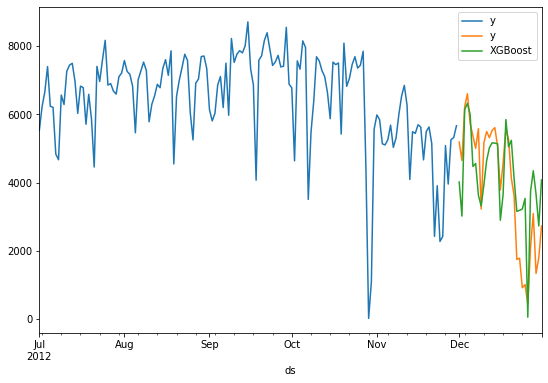

In [31]:
#Viz
training_set.y['2012-07-01':].plot(figsize = (9,6), legend = True)
test_set.y.plot(legend = True)
predictions_xgb.plot(legend = True)

#Model assessment

In [32]:
#MAE and RMSE
from sklearn.metrics import mean_squared_error, mean_absolute_error
print(round(mean_absolute_error(test_set['y'], predictions_xgb),0))
print(round(np.sqrt(mean_squared_error(test_set['y'], predictions_xgb)), 0))

954.0
1179.0


In [33]:
#MAPE function
def MAPE(y_true, y_pred):
  y_true, y_pred = np.array(y_true), np.array(y_pred)
  return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
MAPE(test_set['y'], predictions_xgb)

45.99199599293936

#export forecasts

In [34]:
%cd /content/drive/MyDrive/Forecasting Models and Time Series for Business in Python/0. Ensemble

/content/drive/MyDrive/Forecasting Models and Time Series for Business in Python/0. Ensemble


In [35]:
predictions_xgb.to_csv('predictions_xgb.csv', index = True)